## Read in the appropriate packages

In [393]:
#conda install -c conda-forge frozendict
#conda install -c conda-forge yfinance

In [394]:
from pandas_datareader import data as pdr
import yfinance as yf  #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics
from sklearn.preprocessing import MinMaxScaler
from random import gauss #create gaussian white noise
from random import seed
from pandas import Series


### Author's Note

Coming from an architecture background, I found it exciting to analyze the stock price of one of the leading real estate companies, CBRE. I examined CBRE's stock alongside economic factors such as inflation, commercial real estate prices, and the delinquency rate on real estate loans. This assignment was a valuable learning experience and provided me with greater clarity on what we covered in class.

### First, download CBRE stock using pandas_datareader

In [395]:
# Define stock ticker and date range
stock_ticker = 'CBRE'
stock_start_date = datetime.date(2014,1,1)
stock_end_date = datetime.date.today()

# Fetch the stock price from Yahoo Finance using yfinance
stock_df = yf.download(stock_ticker, start=stock_start_date, end=stock_end_date)

[*********************100%***********************]  1 of 1 completed


In [396]:
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,26.270000,26.549999,26.070000,26.340000,26.340000,2607000
2014-01-03,26.330000,26.549999,26.280001,26.400000,26.400000,1158300
2014-01-06,26.469999,26.580000,26.129999,26.250000,26.250000,1945600
2014-01-07,26.290001,26.360001,26.030001,26.190001,26.190001,2203400
2014-01-08,26.080000,26.219999,25.860001,26.190001,26.190001,2398700
...,...,...,...,...,...,...
2024-09-06,114.059998,115.239998,112.379997,113.550003,113.550003,1659600
2024-09-09,113.779999,115.559998,112.489998,115.260002,115.260002,1514600
2024-09-10,115.389999,117.040001,114.709999,116.800003,116.800003,1239900


In [397]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2692 entries, 2014-01-02 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2692 non-null   float64
 1   High       2692 non-null   float64
 2   Low        2692 non-null   float64
 3   Close      2692 non-null   float64
 4   Adj Close  2692 non-null   float64
 5   Volume     2692 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.2 KB


In [398]:
stock_df.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2024-08-29', '2024-08-30', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06', '2024-09-09', '2024-09-10',
               '2024-09-11', '2024-09-12'],
              dtype='datetime64[ns]', name='Date', length=2692, freq=None)

## 2. Exploratory Data Analysis (EDA)


In [236]:
# 1. Descriptive Statistics
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2.692000e+03
mean,55.452344,56.080802,54.815892,55.463354,55.463354,1.898248e+06
std,24.047061,24.337606,23.777504,24.058603,24.058603,9.421641e+05
min,22.900000,23.709999,22.740000,23.320000,23.320000,2.982000e+05
25%,34.887500,35.159999,34.527499,34.919998,34.919998,1.291550e+06
50%,47.450001,47.900002,46.970001,47.419998,47.419998,1.664500e+06
75%,78.010000,79.004999,76.985003,78.052502,78.052502,2.216600e+06
max,117.489998,118.389999,116.540001,117.480003,117.480003,9.857700e+06


<Axes: >

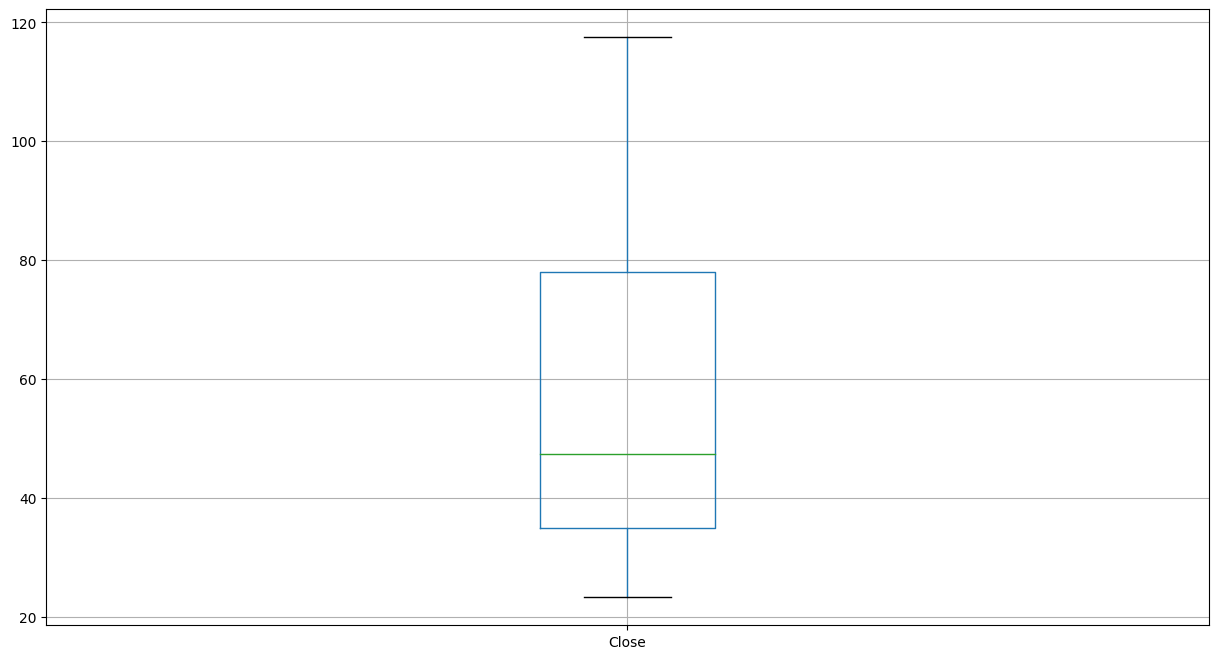

In [237]:
stock_df = stock_df[['Close']]
plt.figure(figsize=(15,8))
stock_df.boxplot()

In [238]:
# 2. Check for missing values
stock_df.isnull().sum()

,0
Close,0


In [239]:
# 3. Find the indexes that are missing
pd.date_range(start = '2014-01-01', end = stock_end_date).difference(stock_df.index)

DatetimeIndex(['2014-01-01', '2014-01-04', '2014-01-05', '2014-01-11',
               '2014-01-12', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-25', '2014-01-26',
               ...
               '2024-08-17', '2024-08-18', '2024-08-24', '2024-08-25',
               '2024-08-31', '2024-09-01', '2024-09-02', '2024-09-07',
               '2024-09-08', '2024-09-13'],
              dtype='datetime64[ns]', length=1217, freq=None)

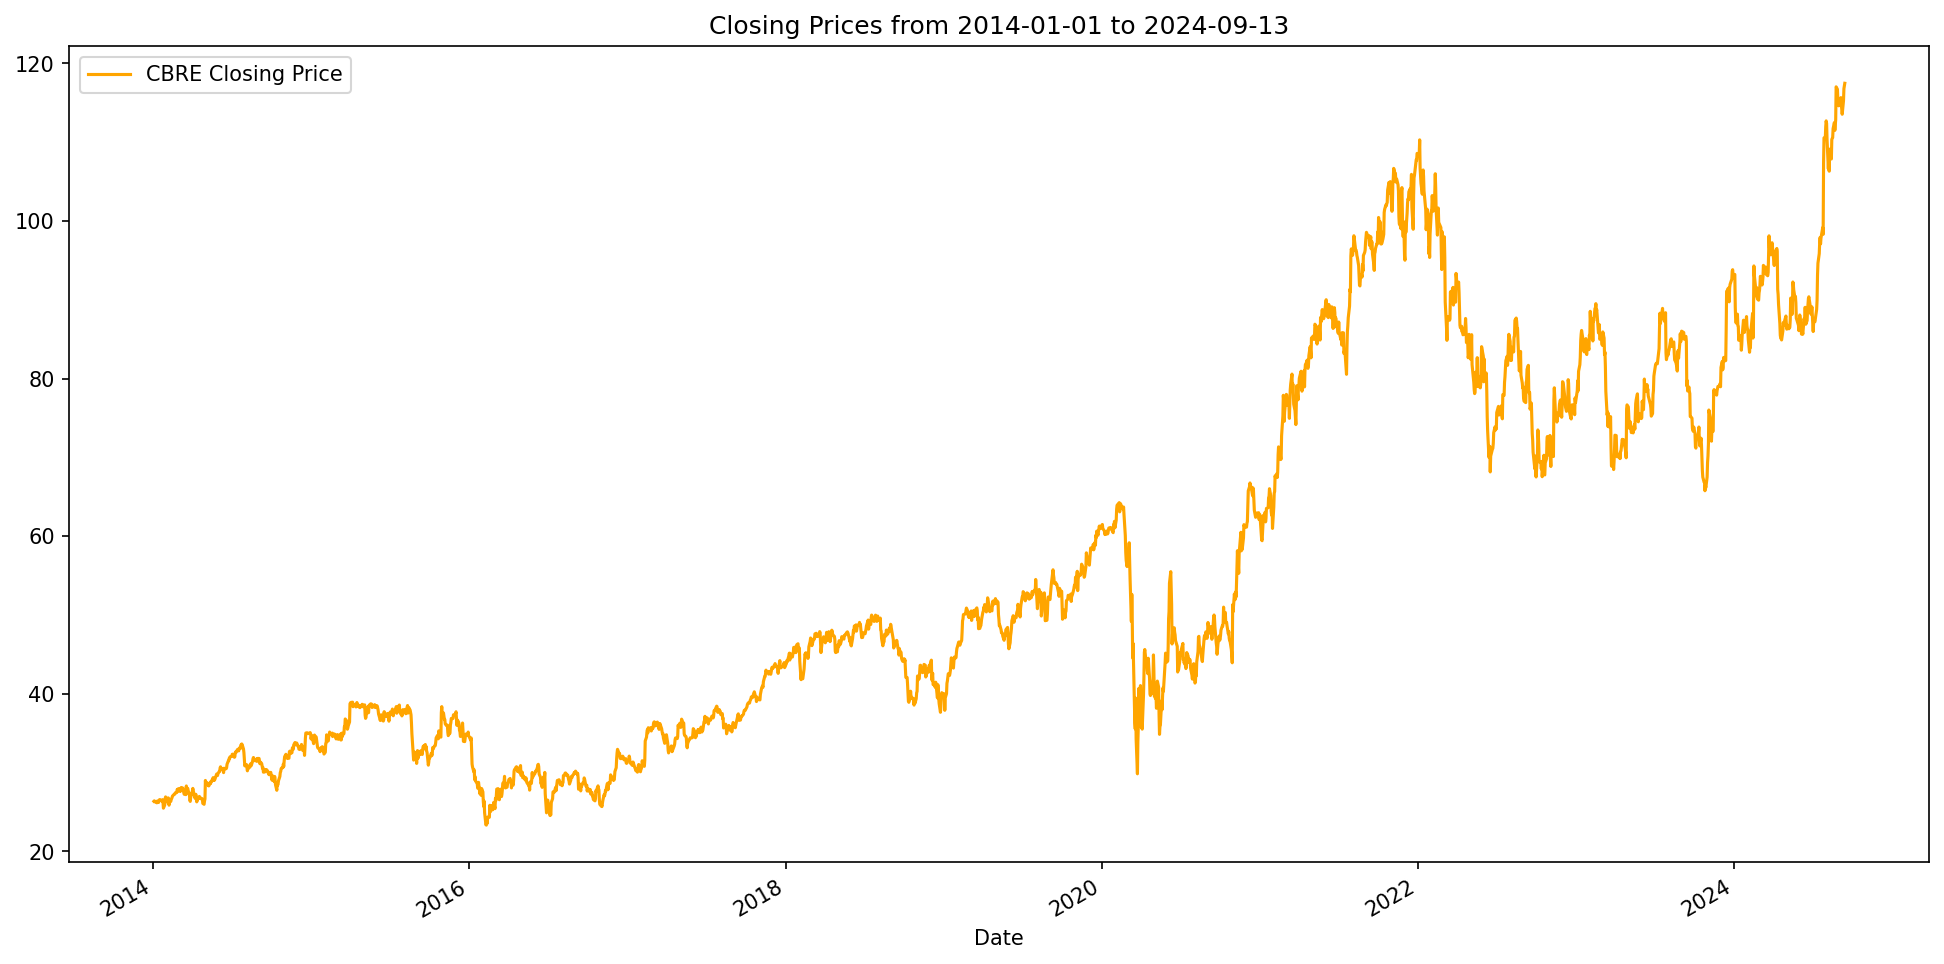

In [240]:
# Visualizing The Close Price of the stocks

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df['Close'].plot(label='CBRE Closing Price', color='orange')

# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


In [241]:
# 4. Let's complete the broken time series indexes and interpolate (impute missing values) the data

# SEE SLIDES

Source: https://www.section.io/engineering-education/missing-values-in-time-series/

Some time series models work with complete data, and therefore they require the missing data to be replaced with meaningful values before actual analysis. At a high level, missing values in time series are handled in two ways, either dropping them or replacing them. However, dropping missing values can be an inappropriate solution due to the time order of the data and the correlation between observations in adjacent periods.

Estimating a reasonable value such that the components of the series are not distorted is an excellent approach to dealing with missing values in time series. Imputation replaces missing values with values estimated from the same data or observed from the environment with the same conditions underlying the missing data.

Different ways to impute the missing values are as follows.
1. Mean or Median imputation
2. Last Observation Carried Forward (LOCF) or forward fill - the missing value is imputed using the values before it in the time series
3. Next Observation Carried Backward (NOCB) or back fill- the missing values are imputed using an immediate value ahead of them
4. Linear interpolation - estimates unknown values by assuming linear relation within a range of data points
5. Spline interpolation - estimates values that minimize overall curvature, thus obtaining a smooth surface passing through the input points


In [242]:
stock_df

,Close
Date,
2014-01-02,26.340000
2014-01-03,26.400000
2014-01-06,26.250000
2014-01-07,26.190001
2014-01-08,26.190001
...,...
2024-09-06,113.550003
2024-09-09,115.260002
2024-09-10,116.800003


In [243]:
# first, fill the misssing values with 'NaN'. Reindexing.
stock_df_NaN = stock_df.reindex(pd.date_range('2014-01-01', stock_end_date), fill_value= np.NaN)
stock_df_NaN

,Close
2014-01-01,NaN
2014-01-02,26.340000
2014-01-03,26.400000
2014-01-04,NaN
2014-01-05,NaN
...,...
2024-09-09,115.260002
2024-09-10,116.800003
2024-09-11,117.120003
2024-09-12,117.480003


In [244]:
# next, let's use ALL the different imputation techniques on CBRE

stock_df_imputed = stock_df_NaN.copy()
stock_df_imputed['CBRE_Spline']= stock_df_imputed['Close'].interpolate(method='spline', order=1, limit=10, limit_direction='both')


stock_df_imputed.round(2)


,Close,CBRE_Spline
2014-01-01,NaN,25.81
2014-01-02,26.34,26.34
2014-01-03,26.40,26.40
2014-01-04,NaN,25.90
2014-01-05,NaN,25.93
...,...,...
2024-09-09,115.26,115.26
2024-09-10,116.80,116.80
2024-09-11,117.12,117.12
2024-09-12,117.48,117.48


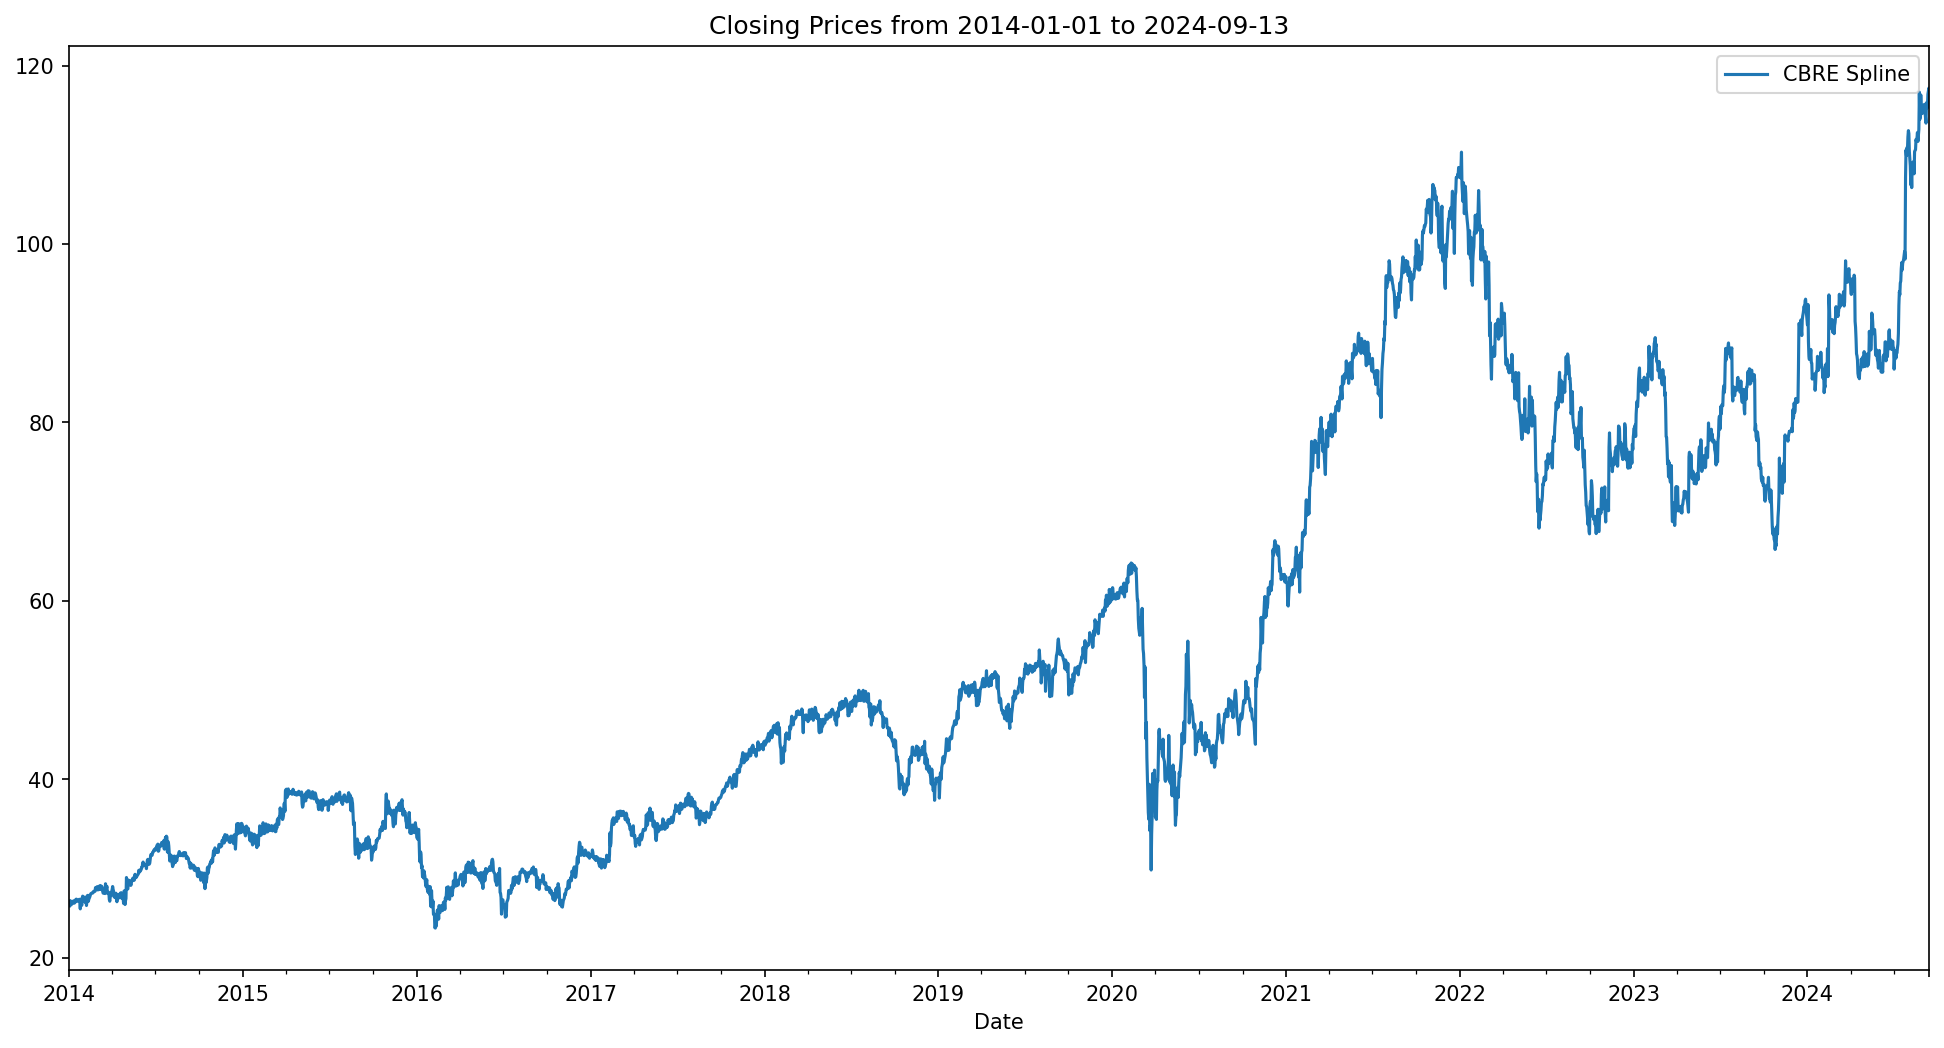

In [245]:
#Plot

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
stock_df_imputed['CBRE_Spline'].plot(label='CBRE Spline')


# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


Brief overview of Outlier Detection techniques can be found here: https://cnvrg.io/anomaly-detection-python/

1. Distribution-based techniques – Minimum Covariance Determinant, Elliptic Envelope
2. Depth-based technique – Isolation Forest
3. Clustering-based technique – Local Outlier Factor
4. Density-based technique – DBSCAN
5. Unified library for Outlier Detection – PyOD
6. Statistical techniques – Interquartile range
7. Visualization techniques – Box-plot

<Axes: xlabel='None', ylabel='CBRE_Spline'>

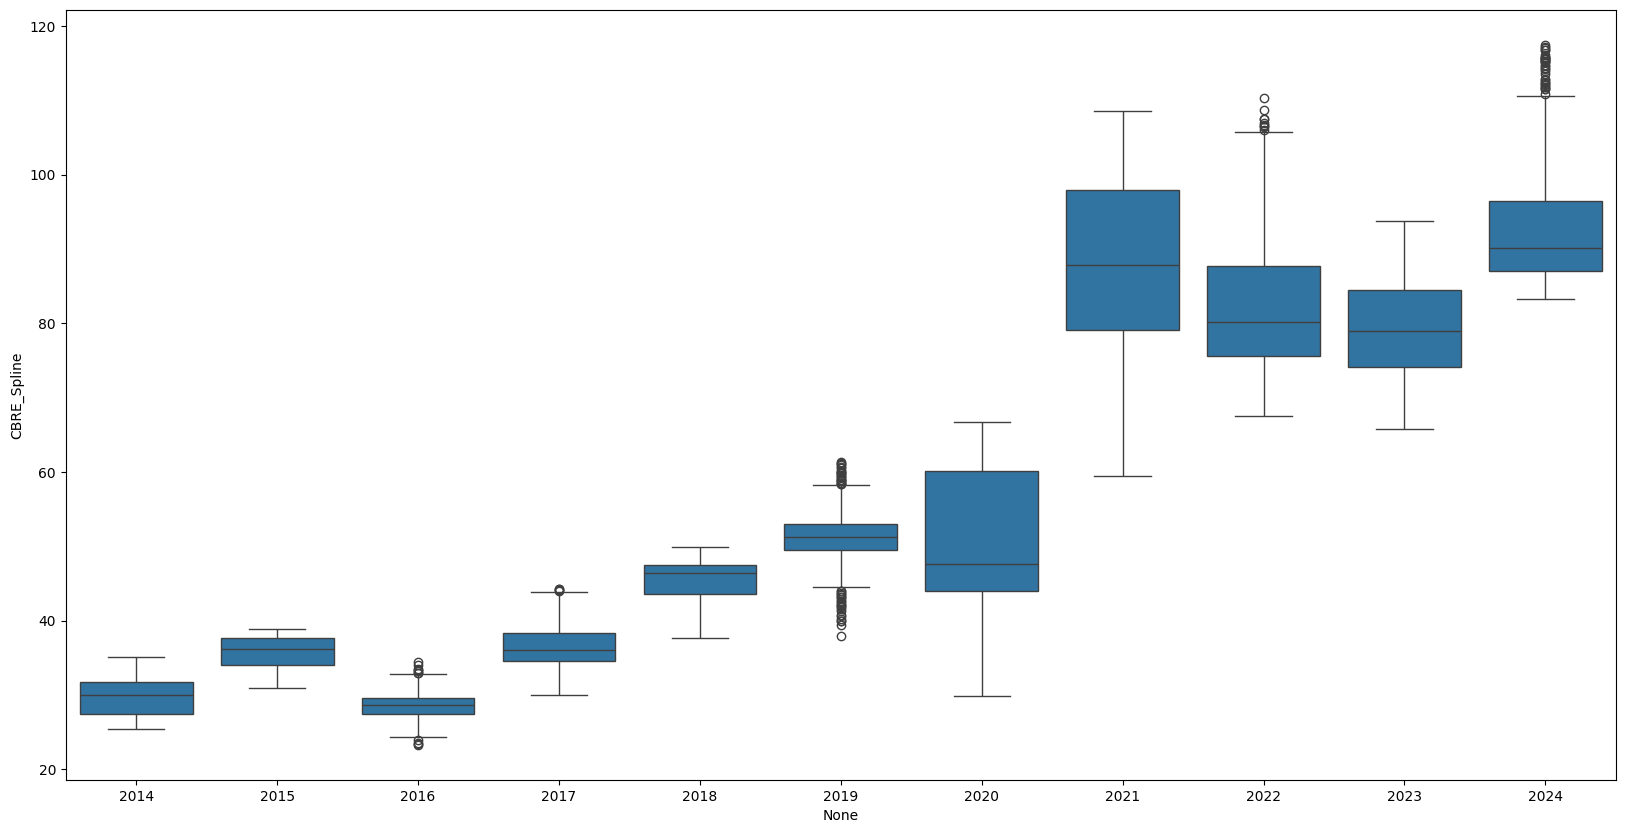

In [246]:
# price variation for each year

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_imputed.index.year,
                y = stock_df_imputed['CBRE_Spline'],
                ax = ax)

<Axes: xlabel='None', ylabel='CBRE_Spline'>

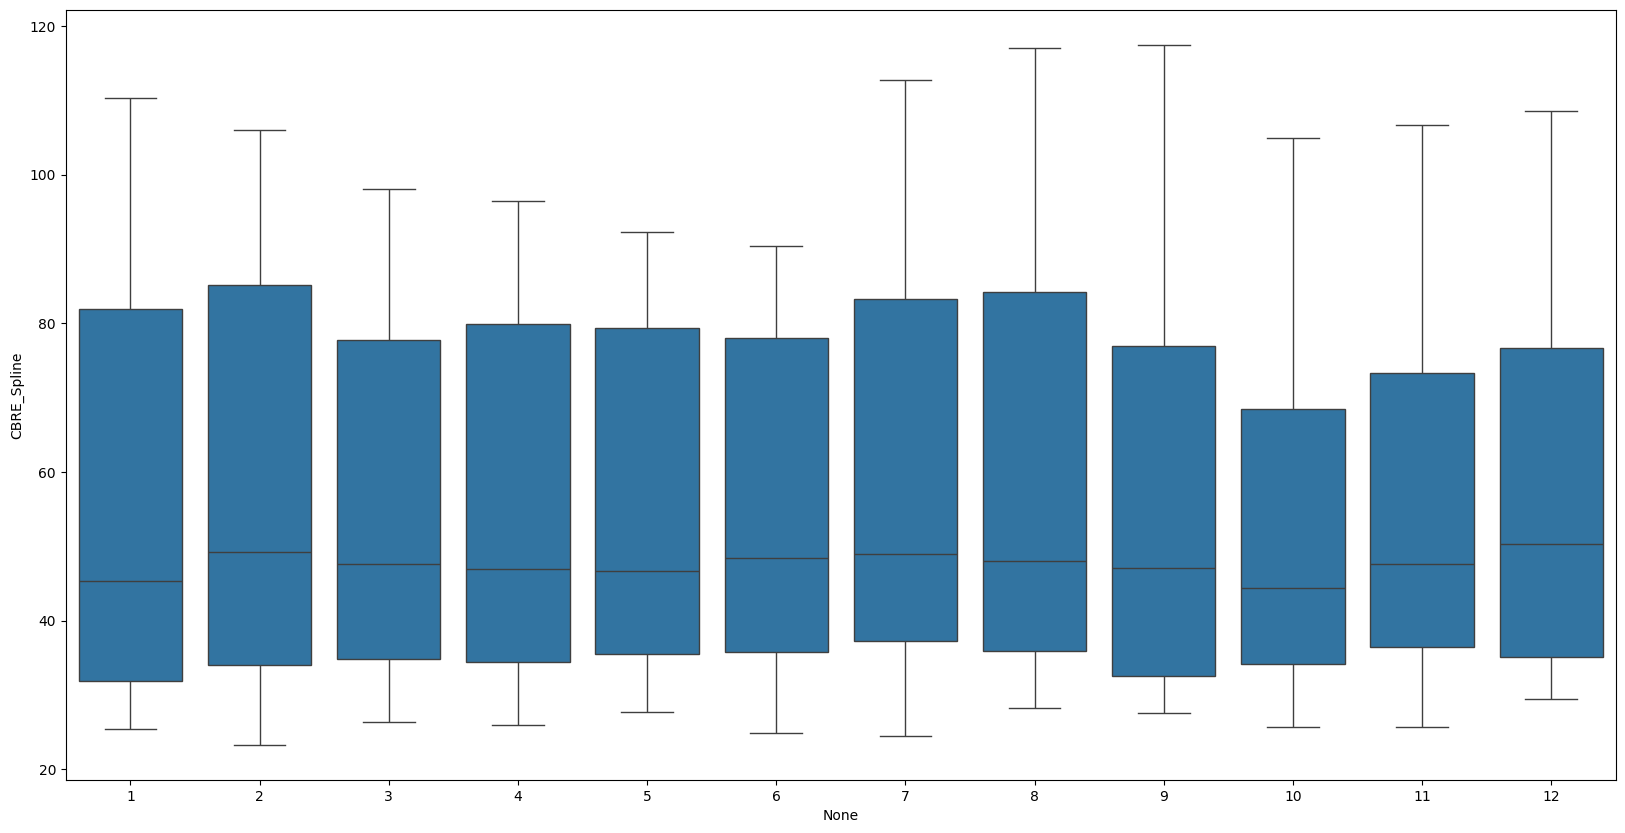

In [247]:
# price variation for each month

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_imputed.index.month,
                y = stock_df_imputed['CBRE_Spline'],
                ax = ax)

### **Economic Indicators**

In analyzing CBRE's stock performance, selecting the right economic indicators is crucial for understanding market dynamics.

*   **Inflation** is a key metric as it affects overall purchasing power and cost structures, influencing demand for commercial real estate and the cost of financing.

*   **Commercial Real Estate Prices** provide insights into market valuation trends, reflecting the health and attractiveness of the real estate sector, which directly impacts CBRE's business.

*   **Delinquency Rate on Real Estate Loans** serves as a barometer for financial stress in the real estate market, indicating potential risks and lending conditions that can affect property investments and valuations.

Analyzing these indicators together offers a comprehensive view of the economic environment surrounding CBRE's operations, aiding in more informed investment and strategic decisions.


<ipython-input-392-a6cba16eeb3a>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


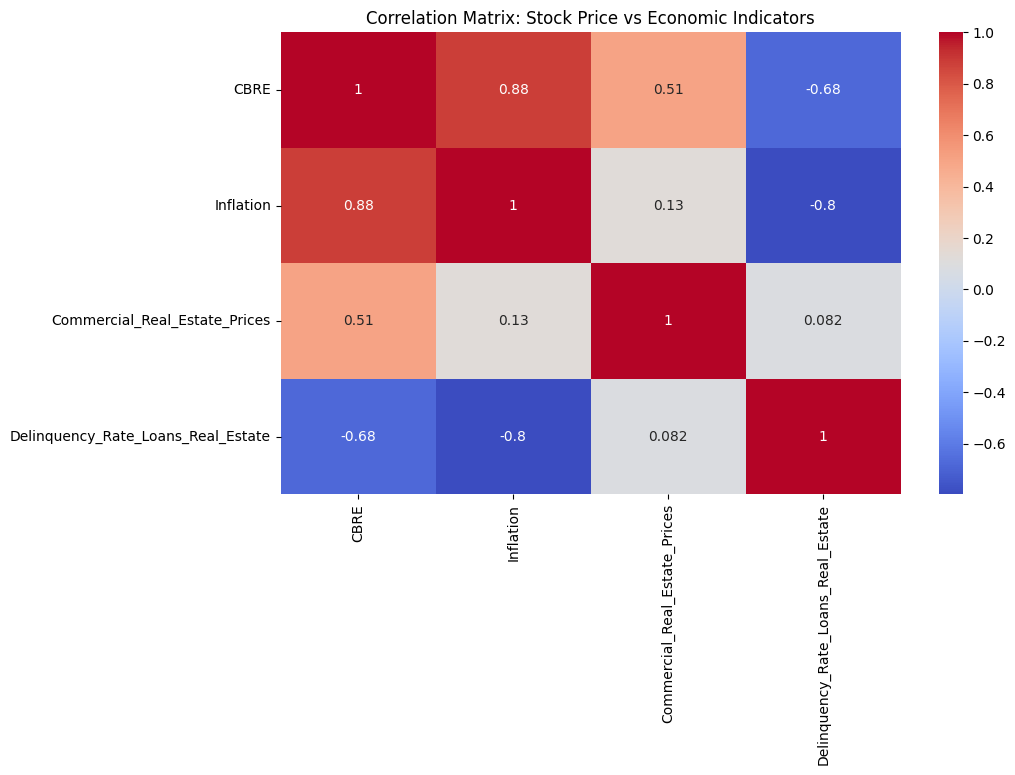

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [392]:
# Fetch economic indicators data
Inflation = pdr.DataReader('CPIAUCSL', 'fred', stock_start_date, stock_end_date)
Commercial_Real_Estate_Prices = pdr.DataReader('COMREPUSQ159N', 'fred', stock_start_date, stock_end_date)
Delinquency_Rate_Loans_Real_Estate = pdr.DataReader('DRSREACBS', 'fred', stock_start_date, stock_end_date)

# Merge datasets
merged_data = pd.merge(stock_df['Close'], Inflation, left_index=True, right_index=True, how='inner')
merged_data = pd.merge(merged_data, Commercial_Real_Estate_Prices, left_index=True, right_index=True, how='inner')
merged_data = pd.merge(merged_data, Delinquency_Rate_Loans_Real_Estate, left_index=True, right_index=True, how='inner')

# Handle missing data (if any)
merged_data.fillna(method='ffill', inplace=True)

# Rename columns for clarity
merged_data.columns = ['CBRE', 'Inflation', 'Commercial_Real_Estate_Prices', 'Delinquency_Rate_Loans_Real_Estate']

# Normalize the data to bring everything to the same scale
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(merged_data), columns=merged_data.columns, index=merged_data.index)

# Calculate correlation matrix
correlation_matrix = normalized_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Stock Price vs Economic Indicators')
plt.show()

# Plot CBRE vs Economic Indicators
plt.figure(figsize=(15, 10))


## **Interpretation:**

In the provided heatmap, the correlation matrix displays the relationship between CBRE stock prices and three economic indicators: inflation, commercial real estate prices, and delinquency rates on real estate loans. Here's a breakdown of the correlations involving CBRE:

**CBRE and Inflation:** The correlation is 0.88, indicating a strong positive relationship. As inflation rises, CBRE stock prices tend to increase as well.

**CBRE and Commercial Real Estate Prices**: The correlation is 0.51, indicating a moderate positive relationship. An increase in commercial real estate prices is moderately linked to an increase in CBRE stock prices.

**CBRE and Delinquency Rate on Real Estate Loans:** The correlation is -0.68, indicating a strong negative relationship. As delinquency rates increase, CBRE stock prices tend to decrease.

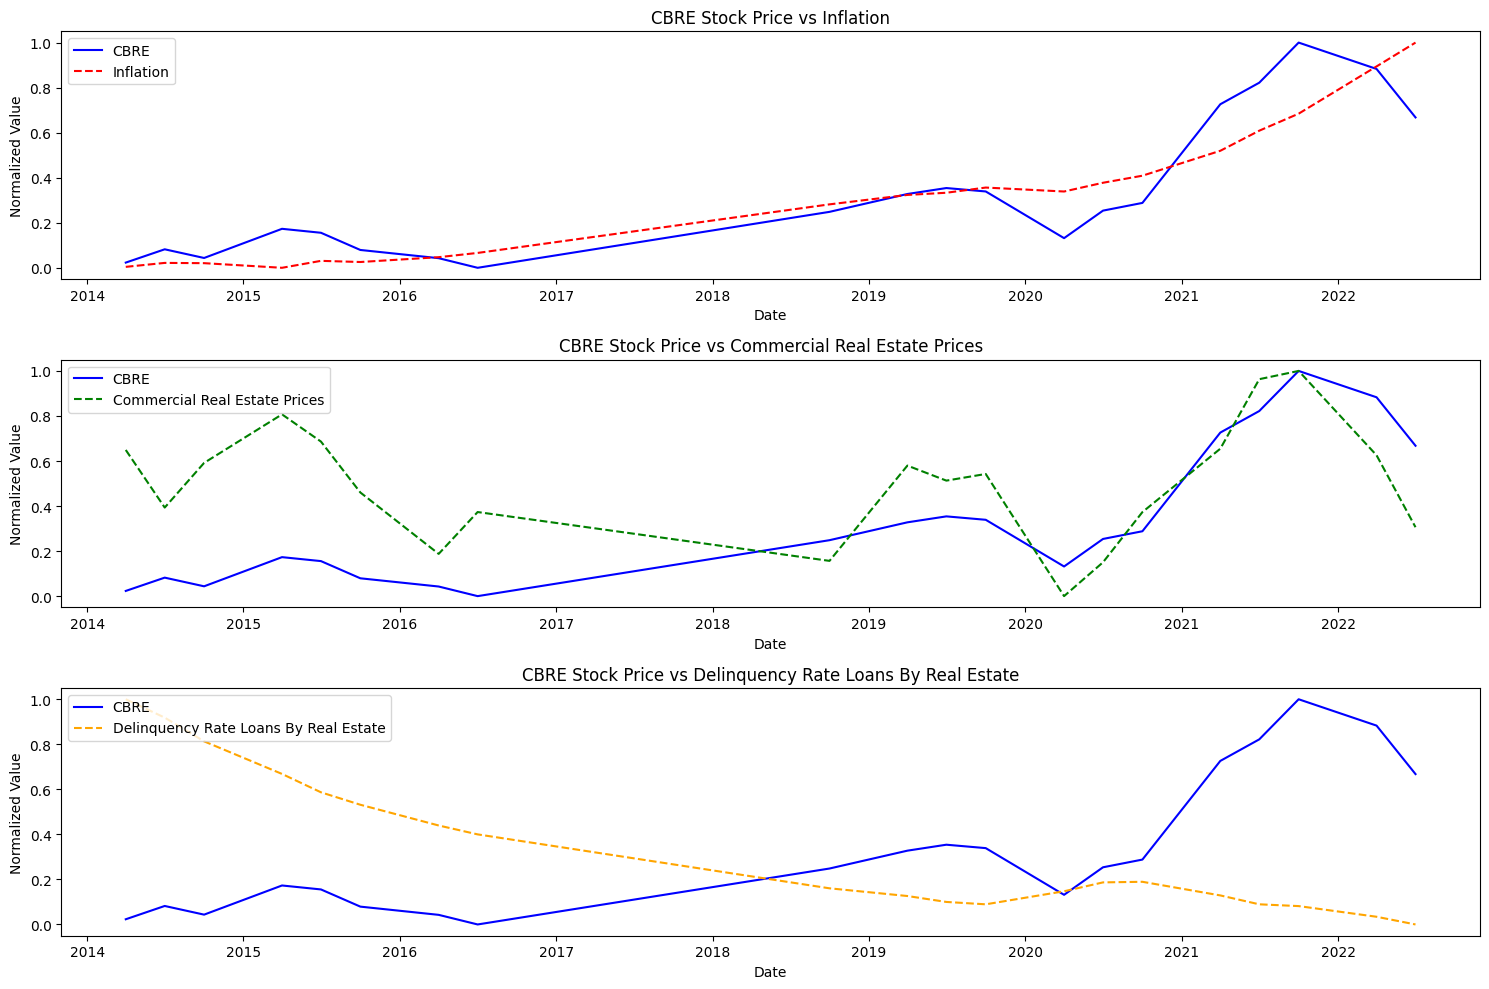

In [391]:
# Plot CBRE vs Economic Indicators
plt.figure(figsize=(15, 10))

# Plot CBRE vs Inflation
plt.subplot(3, 1, 1)
plt.plot(normalized_data.index, normalized_data['CBRE'], label='CBRE', color='blue')
plt.plot(normalized_data.index, normalized_data['Inflation'], label='Inflation', color='red', linestyle='--')
plt.legend(loc='upper left')
plt.title('CBRE Stock Price vs Inflation')
plt.xlabel('Date')
plt.ylabel('Normalized Value')

# Plot CBRE vs Commercial Real Estate Prices
plt.subplot(3, 1, 2)
plt.plot(normalized_data.index, normalized_data['CBRE'], label='CBRE', color='blue')
plt.plot(normalized_data.index, normalized_data['Commercial_Real_Estate_Prices'], label='Commercial Real Estate Prices', color='green', linestyle='--')
plt.legend(loc='upper left')
plt.title('CBRE Stock Price vs Commercial Real Estate Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Value')

# Plot CBRE vs Delinquency Rate Loans By Real Estate
plt.subplot(3, 1, 3)
plt.plot(normalized_data.index, normalized_data['CBRE'], label='CBRE', color='blue')
plt.plot(normalized_data.index, normalized_data['Delinquency_Rate_Loans_Real_Estate'], label='Delinquency Rate Loans By Real Estate', color='orange', linestyle='--')
plt.legend(loc='upper left')
plt.title('CBRE Stock Price vs Delinquency Rate Loans By Real Estate')
plt.xlabel('Date')
plt.ylabel('Normalized Value')

plt.tight_layout()
plt.show()

In [250]:
# 6. Resampling

**Resampling** involves changing the frequency of your time series observations. Two types of
resampling are:
1. Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
2. Downsampling: Where you decrease the frequency of the samples, such as from days to months.

In both cases, data must be invented. In the case of upsampling, care may be needed in
determining how the fine-grained observations are calculated using interpolation. In the case of
downsampling, care may be needed in selecting the summary statistics used to calculate the
new aggregated values.

There are perhaps two main reasons why you may be interested in resampling your time
series data:
1. Problem Framing: Resampling may be required if your data is not available at the same frequency that you want to make predictions.
2. Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

There is a lot of overlap between these two cases. For example, you may have daily data
and want to predict a monthly problem. You could use the daily data directly or you could
downsample it to monthly data and develop your model. A feature engineering perspective may
use observations and summaries of observations from both time scales and more in developing a
model.

In [251]:
df_resample = stock_df_imputed.copy()

# extract only the spline variables
df_resample = df_resample[['CBRE_Spline']].round(2)
df_resample

,CBRE_Spline
2014-01-01,25.81
2014-01-02,26.34
2014-01-03,26.40
2014-01-04,25.90
2014-01-05,25.93
...,...
2024-09-09,115.26
2024-09-10,116.80
2024-09-11,117.12
2024-09-12,117.48


In [252]:
# downsample the data from days to months to reduce variability in the data
# observe the stock prices on a monthly basis

df_resample_months = df_resample.groupby(pd.Grouper(freq='MS')).median()

df_resample_months

,CBRE_Spline
2014-01-01,26.350
2014-02-01,27.095
2014-03-01,27.460
2014-04-01,26.865
2014-05-01,28.870
...,...
2024-05-01,87.670
2024-06-01,88.140
2024-07-01,97.090
2024-08-01,111.500


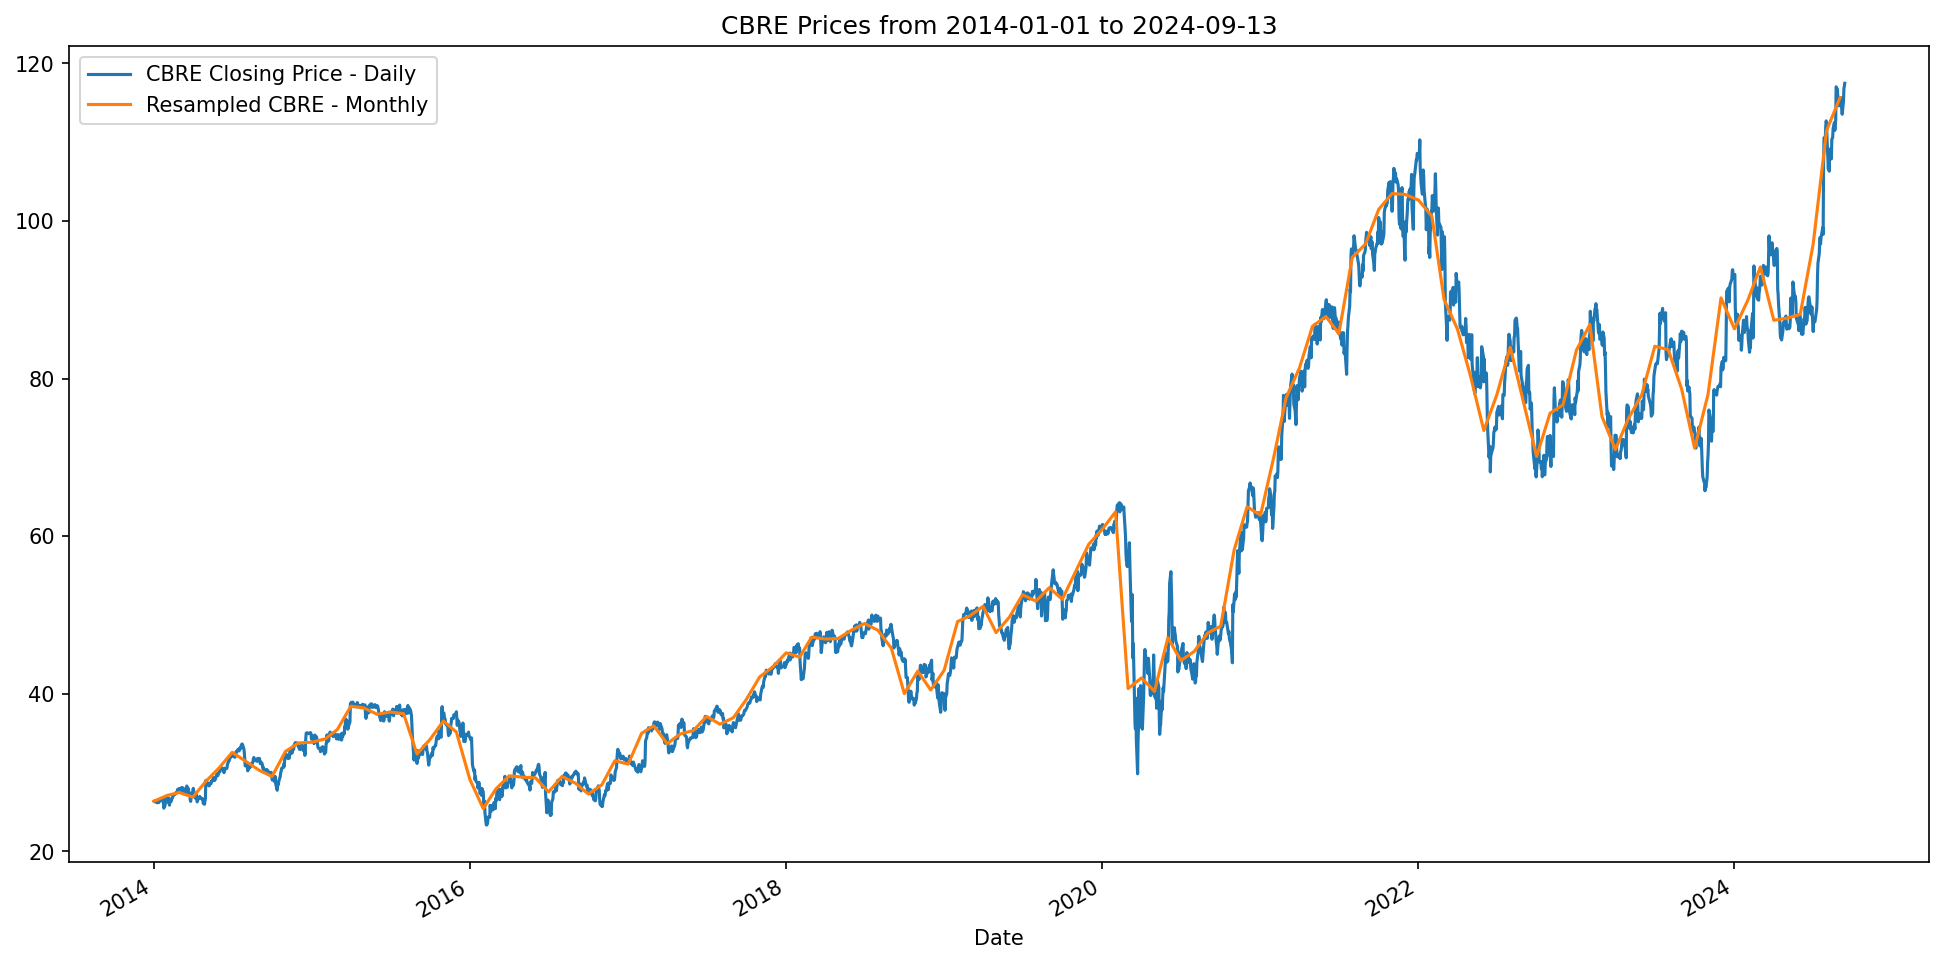

In [253]:
#Plot monthly data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
#df_resample_months['CBRE_Spline'].plot(label='CBREL')
stock_df['Close'].plot(label='CBRE Closing Price - Daily')
df_resample_months['CBRE_Spline'].plot(label='Resampled CBRE - Monthly')


# adding title to the plot
plt.title('CBRE Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()

In [254]:
# 6. Autocorrelation or ACF plot


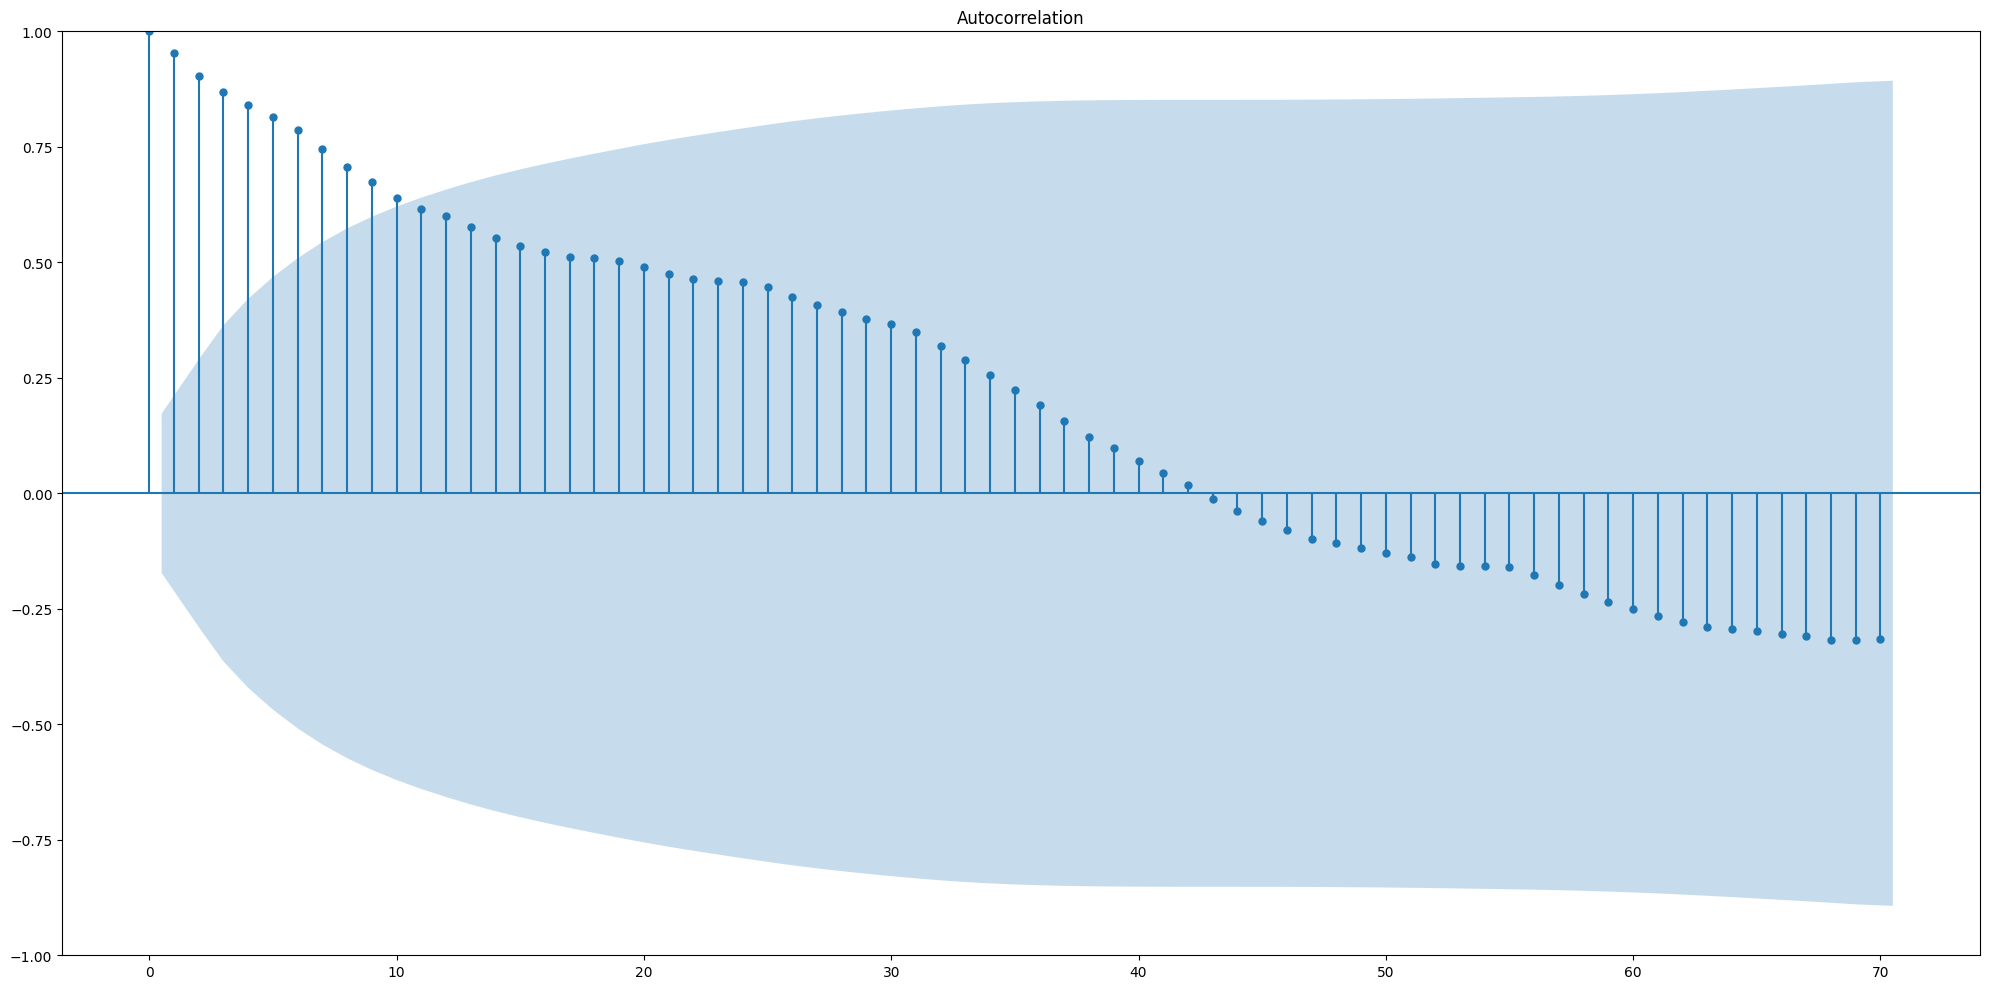

In [255]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(df_resample_months['CBRE_Spline'], lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [293]:
# 7. Time Series Decomposition
# Source: https://stackoverflow.com/questions/20672236/time-series-decomposition-function-in-python

Time series decomposition is a process of deconstructing a time series into the following components:

1. Trend — general movement over time
2. Seasonal — behaviors captured in individual seasonal periods
3. Residual — everything not captured by trend and seasonal components


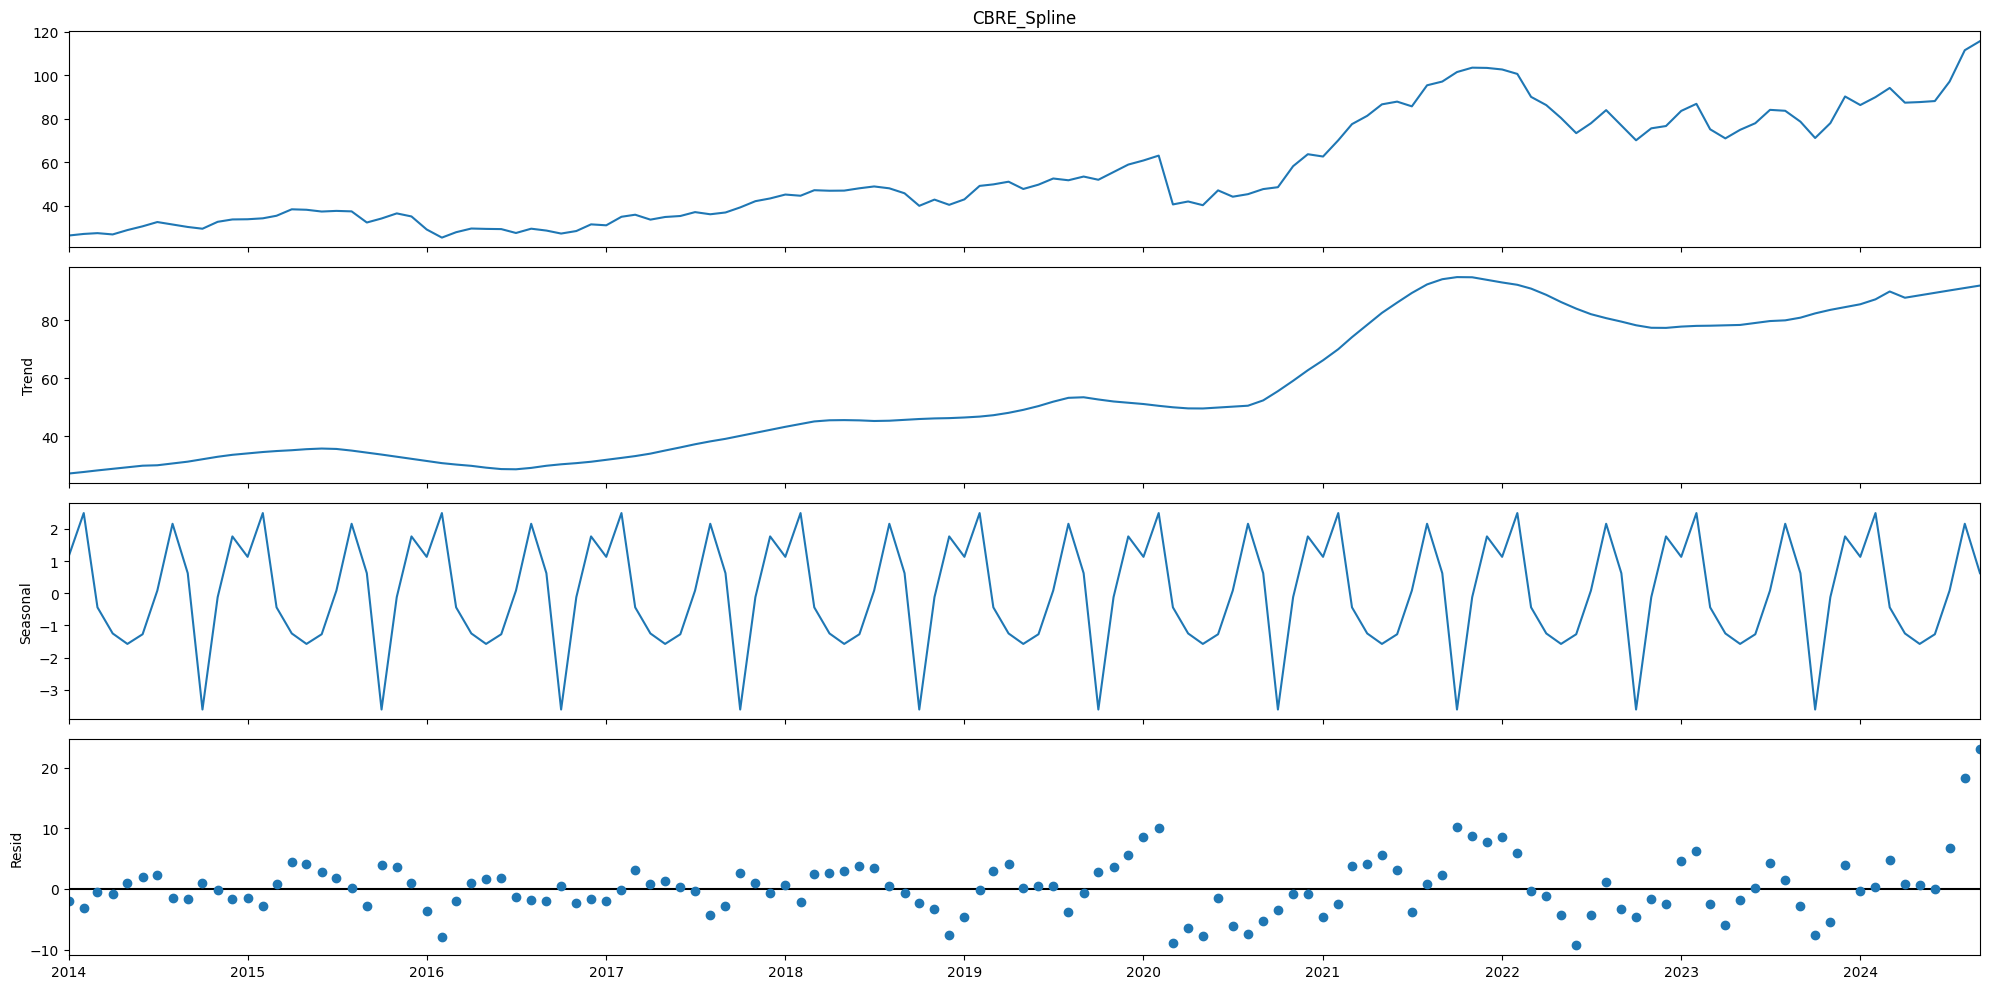

In [294]:
res = sm.tsa.seasonal_decompose(df_resample_months['CBRE_Spline'], period=12, extrapolate_trend='freq')
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [258]:
# We can extract the trend, seasonality, and error terms
# going forward let us only concentrate on one time series

In [259]:
cbre_df = df_resample_months[['CBRE_Spline']]

# extract the decomposed terms
cbre_df['trend'] = res.trend
cbre_df['seasonal'] = res.seasonal
cbre_df['error'] = res.resid
cbre_df

,CBRE_Spline,trend,seasonal,error
2014-01-01,26.350,27.245688,1.133418,-2.029106
2014-02-01,27.095,27.786735,2.495103,-3.186838
2014-03-01,27.460,28.327781,-0.437587,-0.430195
2014-04-01,26.865,28.868828,-1.249070,-0.754758
2014-05-01,28.870,29.409875,-1.574482,1.034607
...,...,...,...,...
2024-05-01,87.670,88.586046,-1.574482,0.658436
2024-06-01,88.140,89.424116,-1.273720,-0.010396
2024-07-01,97.090,90.262187,0.085024,6.742789
2024-08-01,111.500,91.100257,2.161809,18.237934


<Axes: >

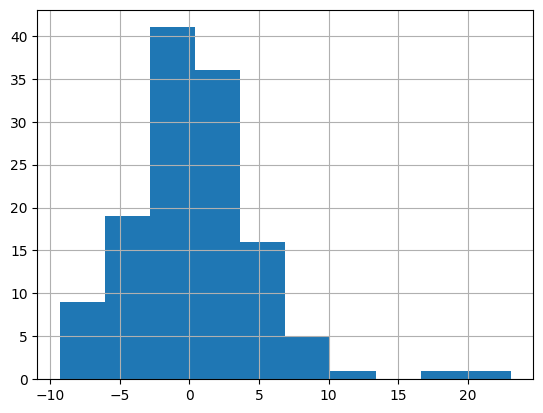

In [295]:
cbre_df['error'].hist()

In [296]:
df_resample_months

,CBRE_Spline
2014-01-01,26.350
2014-02-01,27.095
2014-03-01,27.460
2014-04-01,26.865
2014-05-01,28.870
...,...
2024-05-01,87.670
2024-06-01,88.140
2024-07-01,97.090
2024-08-01,111.500


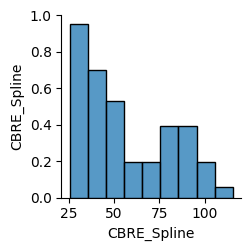

In [297]:
sns.pairplot(df_resample_months)


In [298]:
np.corrcoef(df_resample_months['CBRE_Spline'],df_resample_months['CBRE_Spline'])

array([[1., 1.],
       [1., 1.]])

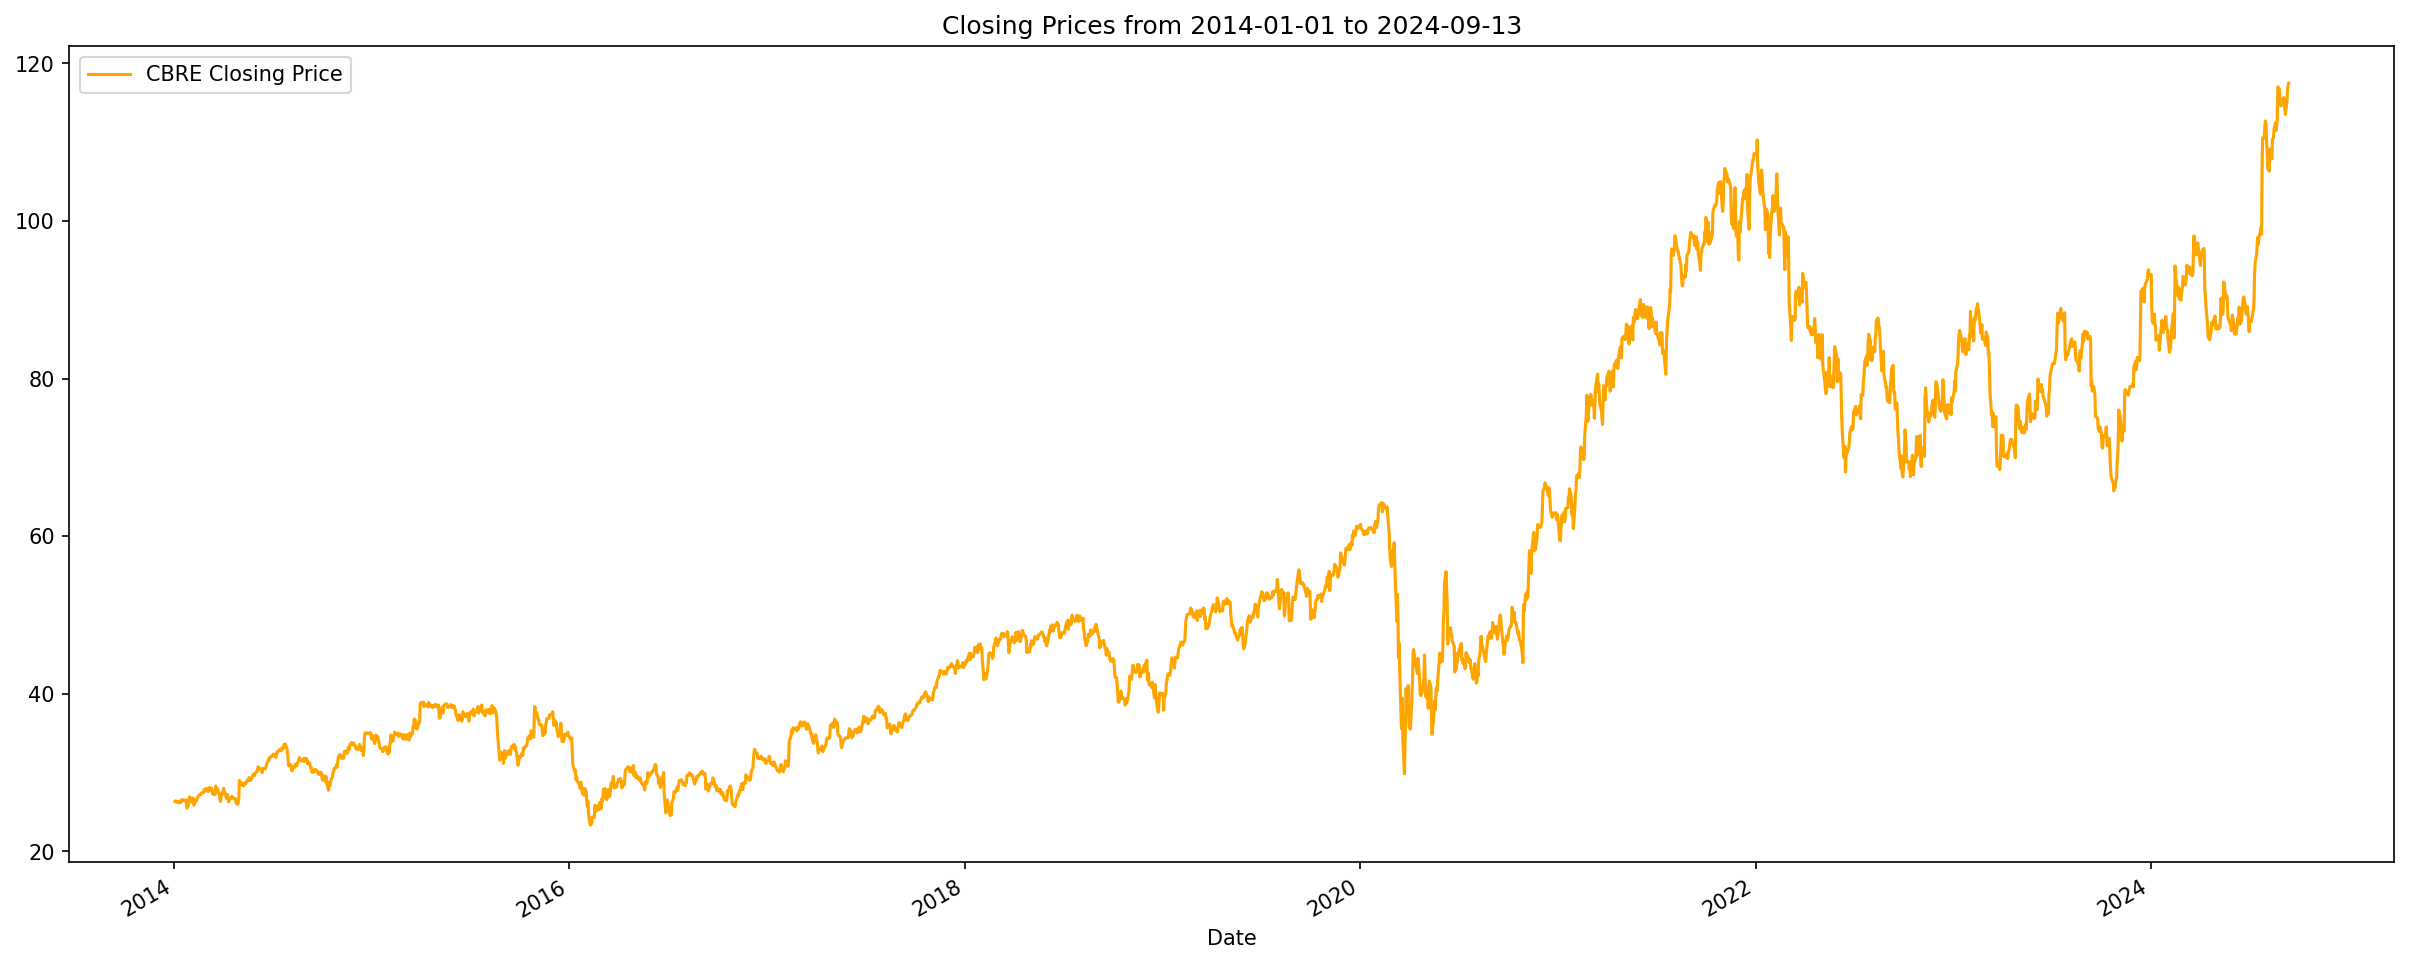

In [299]:
# Visualizing The Close Price of the stocks

# to set the plot size
plt.figure(figsize=(20, 8), dpi=150) #dpi = resolution. default 100.

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df['Close'].plot(label='CBRE Closing Price', color='orange')

# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


In [300]:
df_resample_months

,CBRE_Spline
2014-01-01,26.350
2014-02-01,27.095
2014-03-01,27.460
2014-04-01,26.865
2014-05-01,28.870
...,...
2024-05-01,87.670
2024-06-01,88.140
2024-07-01,97.090
2024-08-01,111.500


In [386]:
differenced = df_resample_months.diff()

In [387]:
differenced

,CBRE_Spline
2014-01-01,NaN
2014-02-01,0.745
2014-03-01,0.365
2014-04-01,-0.595
2014-05-01,2.005
...,...
2024-05-01,0.270
2024-06-01,0.470
2024-07-01,8.950
2024-08-01,14.410


<Axes: >

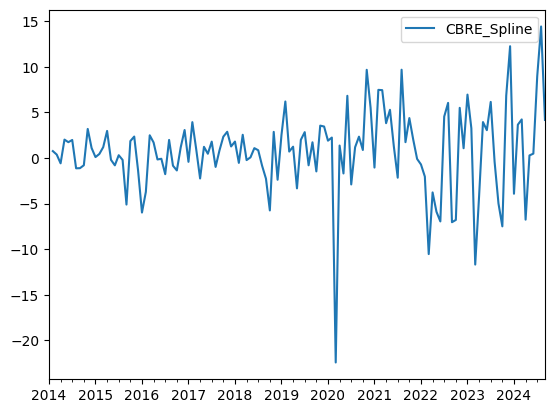

In [388]:
differenced.plot()

In [389]:
np.corrcoef(differenced['CBRE_Spline'].dropna(),differenced['CBRE_Spline'].dropna())

array([[1., 1.],
       [1., 1.]])

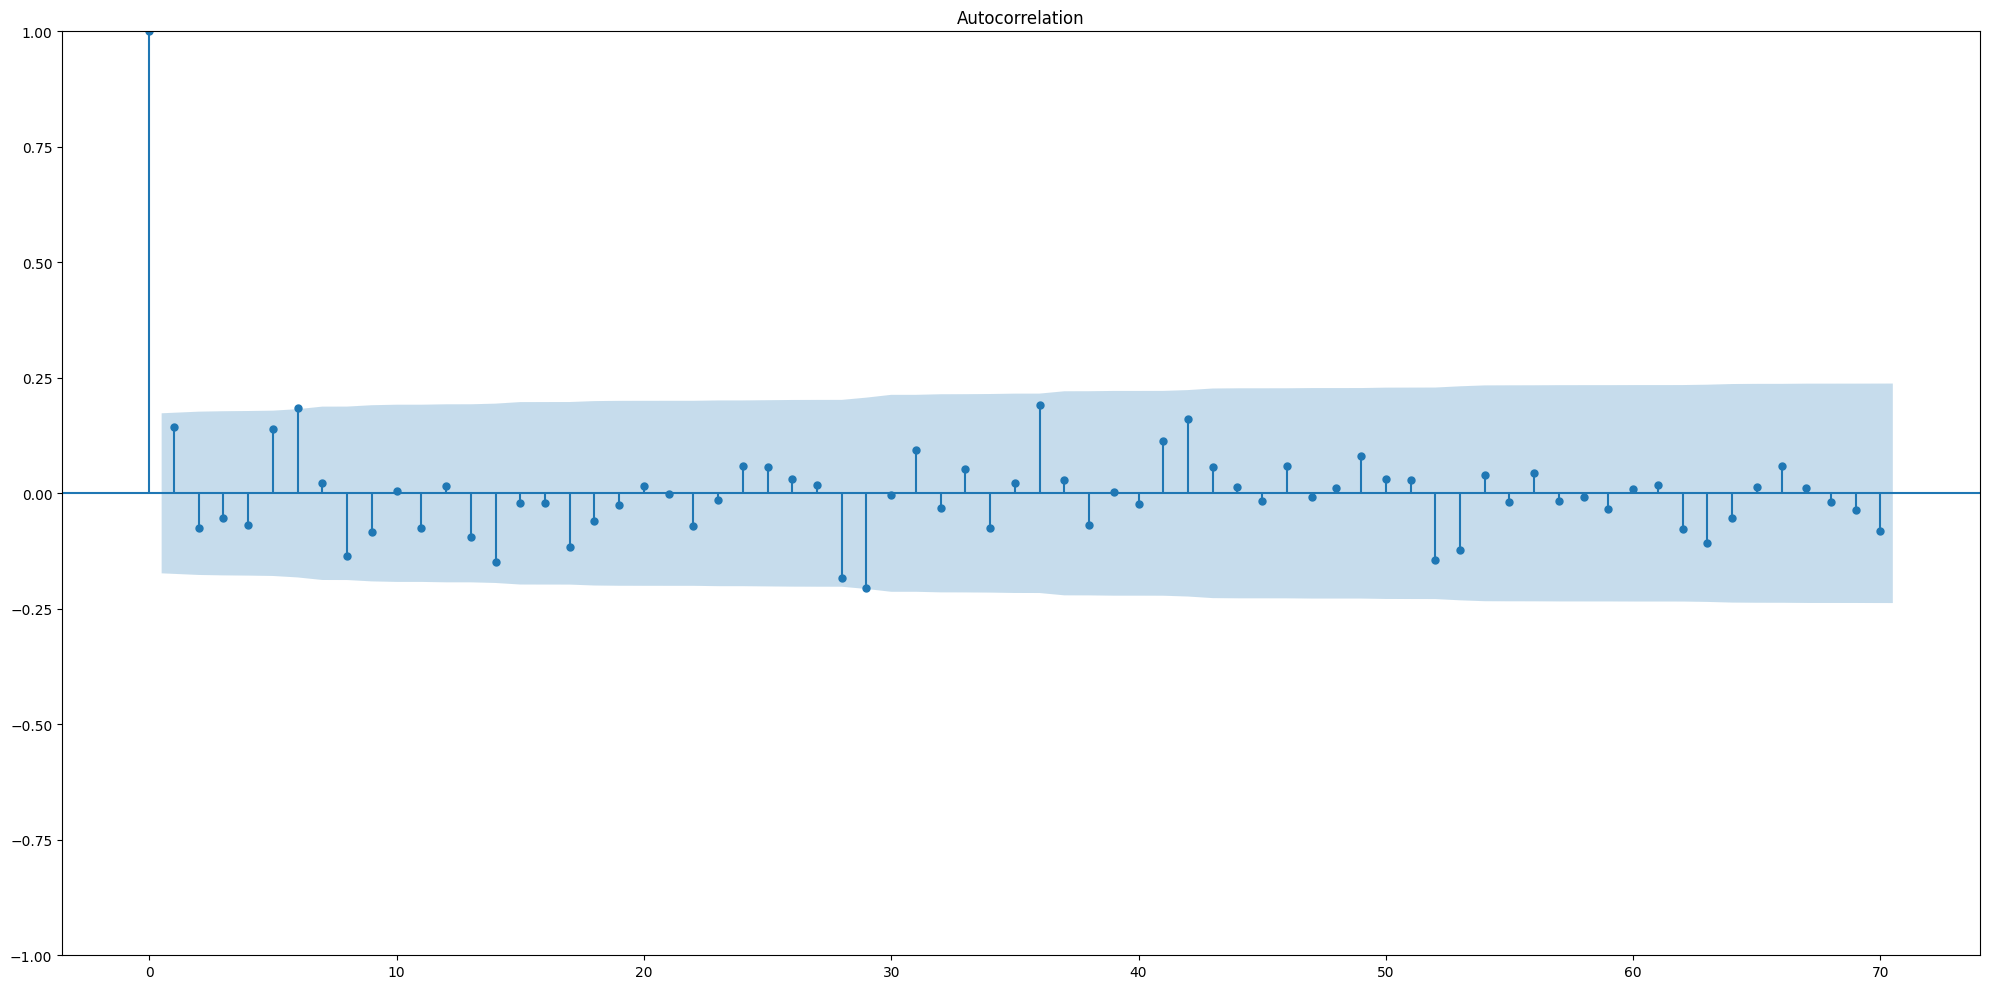

In [280]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(differenced['CBRE_Spline'].dropna(), lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Split data into train and test sets

In [301]:
cbre = cbre_df[['CBRE_Spline']]
cbre

,CBRE_Spline
2014-01-01,26.350
2014-02-01,27.095
2014-03-01,27.460
2014-04-01,26.865
2014-05-01,28.870
...,...
2024-05-01,87.670
2024-06-01,88.140
2024-07-01,97.090
2024-08-01,111.500


In [143]:
from sklearn.model_selection import train_test_split

# Create a test set of 12 data points
test_size = 12

train_data, test_data = train_test_split(cbre, test_size=test_size, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 117
No. of testing examples: 12


In [144]:
train_data

,CBRE_Spline
2014-01-01,26.350
2014-02-01,27.095
2014-03-01,27.460
2014-04-01,26.865
2014-05-01,28.870
...,...
2023-05-01,74.920
2023-06-01,77.960
2023-07-01,84.100
2023-08-01,83.670


In [145]:
test_data

,CBRE_Spline
2023-10-01,71.170
2023-11-01,77.995
2023-12-01,90.240
2024-01-01,86.310
2024-02-01,89.950
2024-03-01,94.170
2024-04-01,87.400
2024-05-01,87.670
2024-06-01,88.140
2024-07-01,97.090


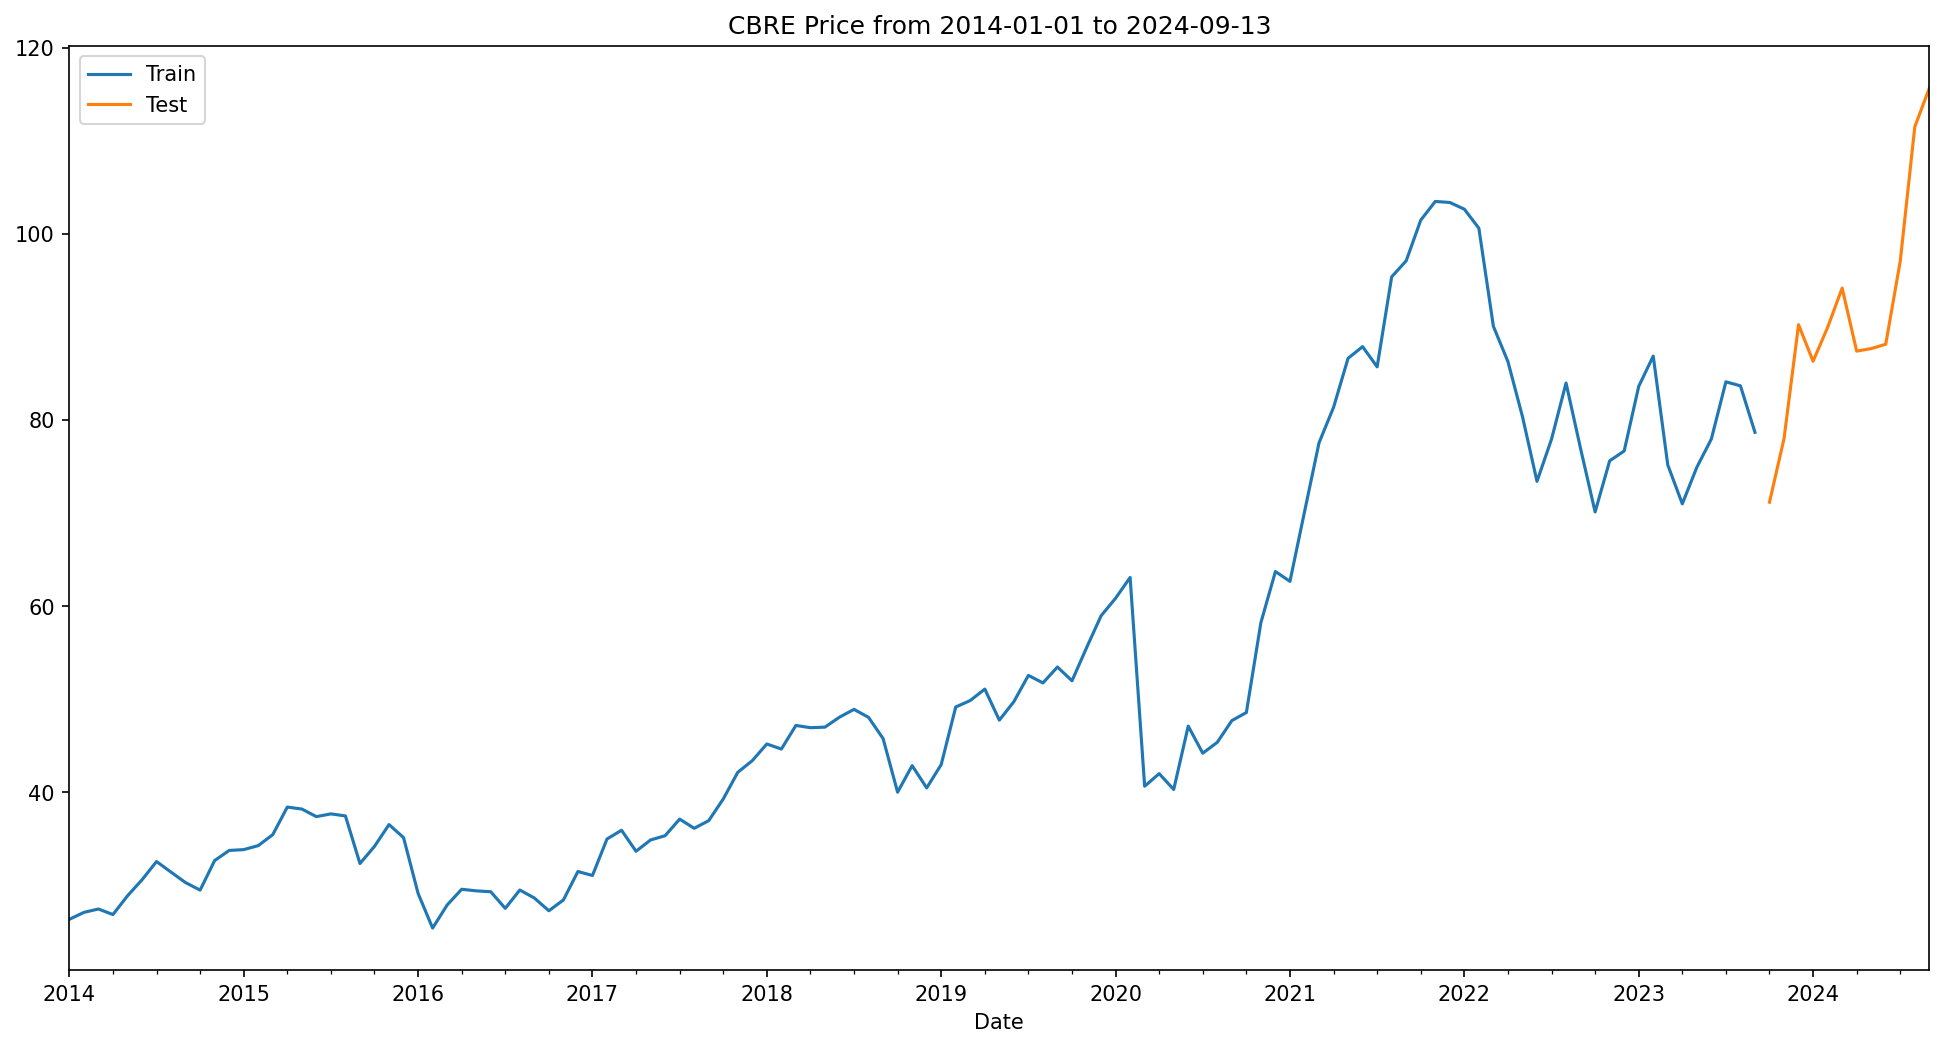

In [146]:
#Plot train and test data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
train_data['CBRE_Spline'].plot(label='Train')
test_data['CBRE_Spline'].plot(label='Test')


# adding title to the plot
plt.title('CBRE Price from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


## Fitting Models - Exponential Smoothing Models

### ETS - Error, Trend, Seasonailty

In [348]:
#SIMPLE EXPONENTIAL MODEL

#First Instance
ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(12).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.5,optimized=False)
ins_cast2 = ins2.forecast(12).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(12).rename('alpha=%s'%ins3.model.params['smoothing_level'])


In [349]:
ins_cast1

,alpha=0.2
2023-10-01,79.667279
2023-11-01,79.667279
2023-12-01,79.667279
2024-01-01,79.667279
2024-02-01,79.667279
2024-03-01,79.667279
2024-04-01,79.667279
2024-05-01,79.667279
2024-06-01,79.667279
2024-07-01,79.667279


In [350]:
test_data

,CBRE_Spline
2023-10-01,71.170
2023-11-01,77.995
2023-12-01,90.240
2024-01-01,86.310
2024-02-01,89.950
2024-03-01,94.170
2024-04-01,87.400
2024-05-01,87.670
2024-06-01,88.140
2024-07-01,97.090


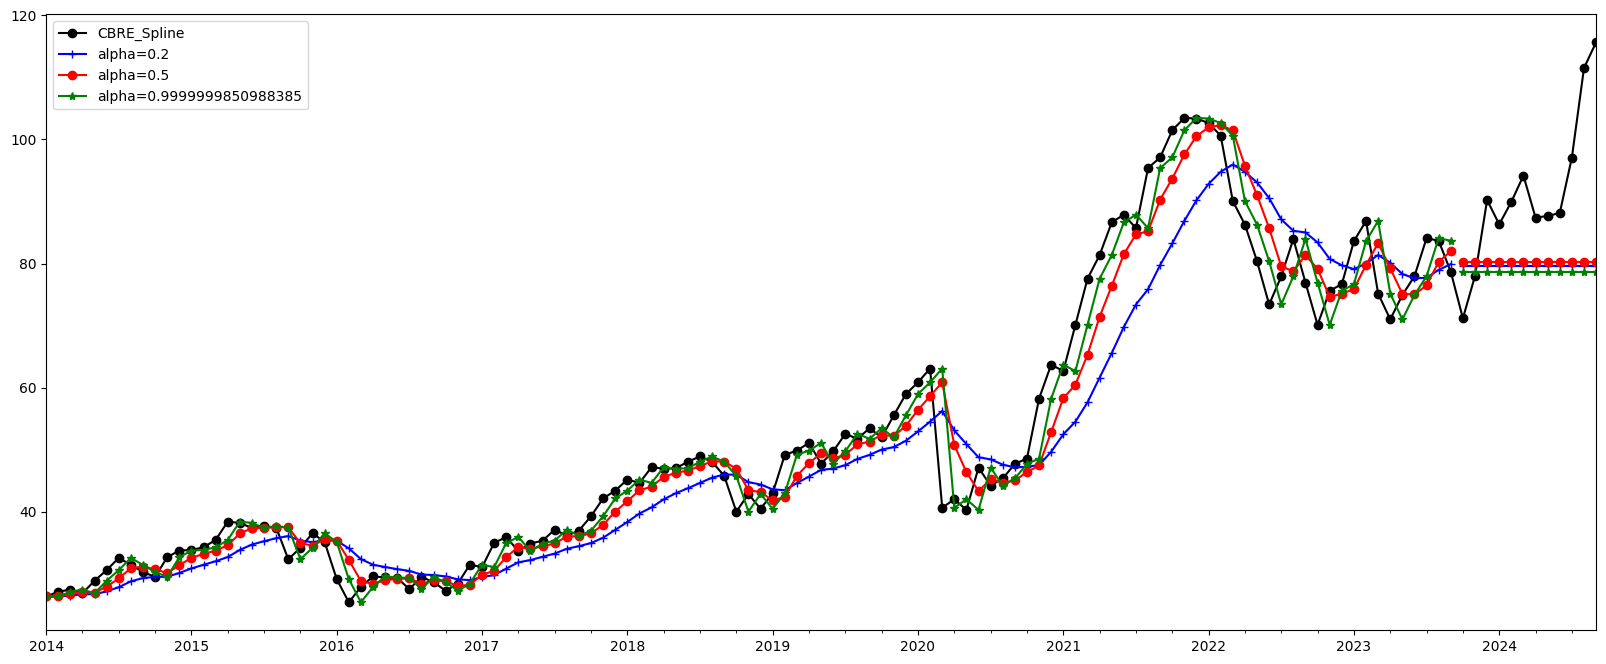

In [351]:
#After creating model we will visualize the plot
ax = cbre.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.5
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

In [353]:
#DOuble EXPONENTIAL MODEL

double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(12)
double_ets_mul_pred = double_ets_mul.forecast(12)


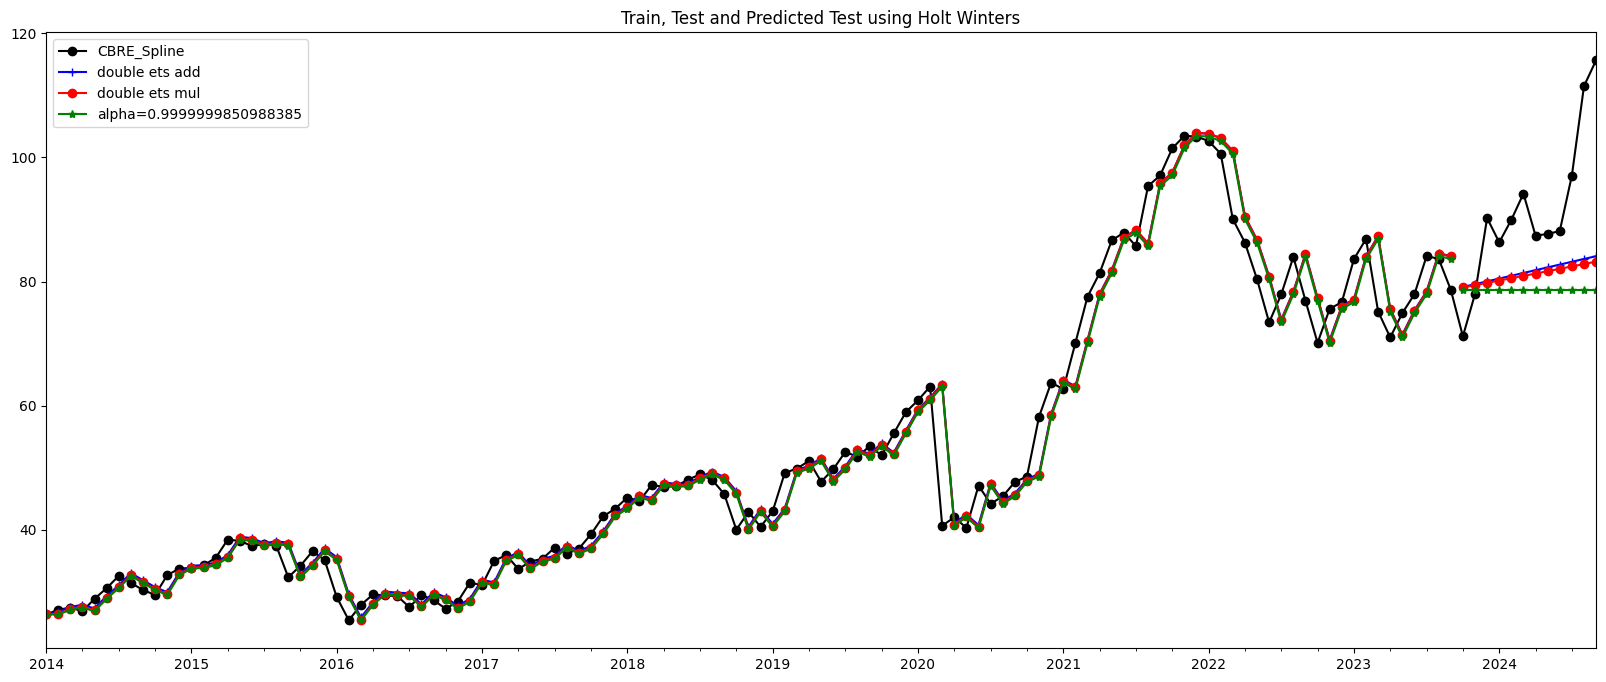

In [354]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = cbre.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()



#### Triple Exponential Smoothing

This is the extended version of simple exponential smoothing to allow the forecasting of data with a trend and seasonality. This method has three smoothing equations and hence three parameters - alpha, beta, and gamma. (one each for the level, trend, and seasonality).

In [355]:
# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

triple_ets_add_pred = triple_ets_add.forecast(12)
triple_ets_mul_pred = triple_ets_mul.forecast(12)


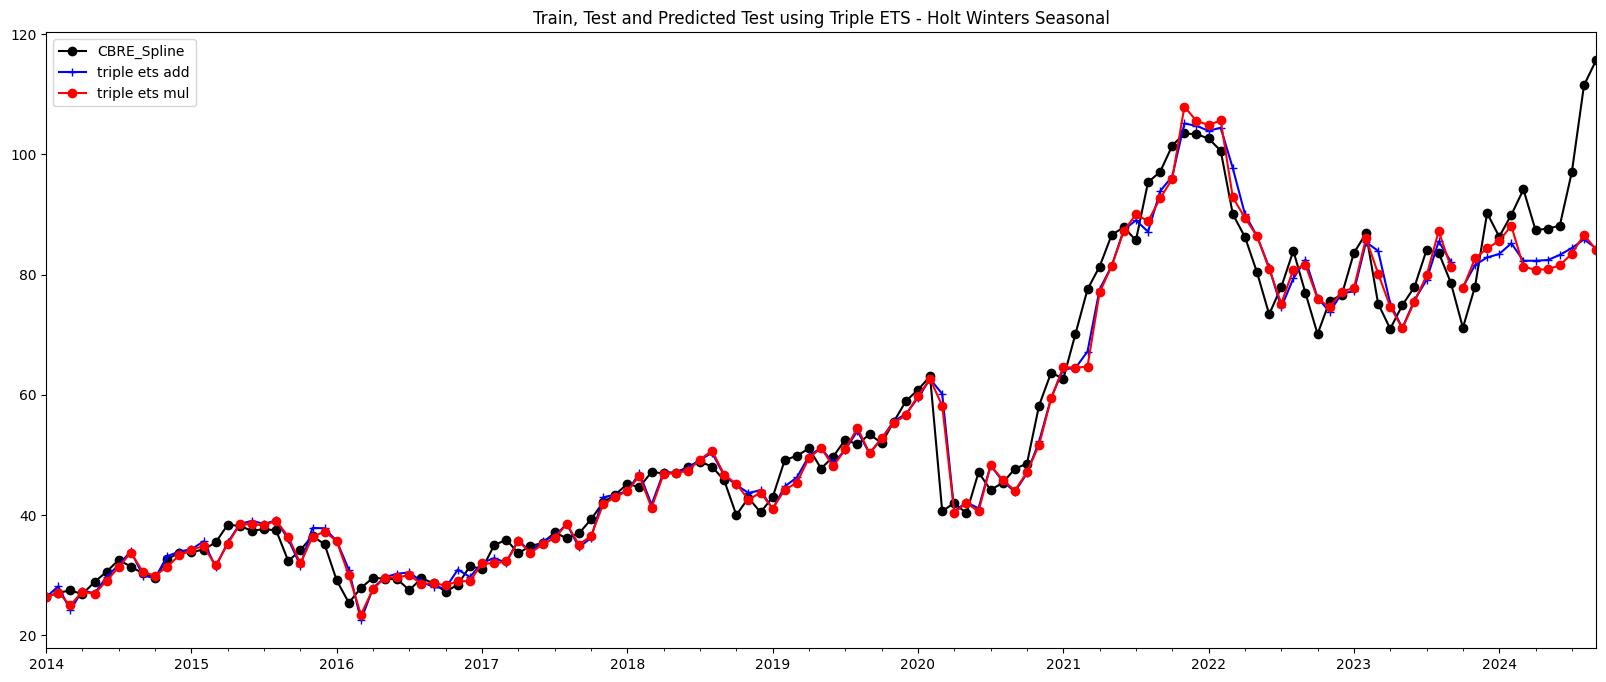

In [356]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = cbre.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

## Visualize Forecast Errors

Source: https://machinelearningmastery.com/visualize-time-series-residual-forecast-errors-with-python/

In [360]:
test_data

,CBRE_Spline
2023-10-01,71.170
2023-11-01,77.995
2023-12-01,90.240
2024-01-01,86.310
2024-02-01,89.950
2024-03-01,94.170
2024-04-01,87.400
2024-05-01,87.670
2024-06-01,88.140
2024-07-01,97.090


In [361]:
#calculate residuals
residuals = [test_data.values.flatten()[i]-triple_ets_add_pred.values.flatten()[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)

In [157]:
residuals

,0
0,-6.748322
1,-3.600596
2,7.368389
3,2.880582
4,4.730080
5,11.854585
6,5.086006
7,5.240506
8,4.864520
9,12.662506


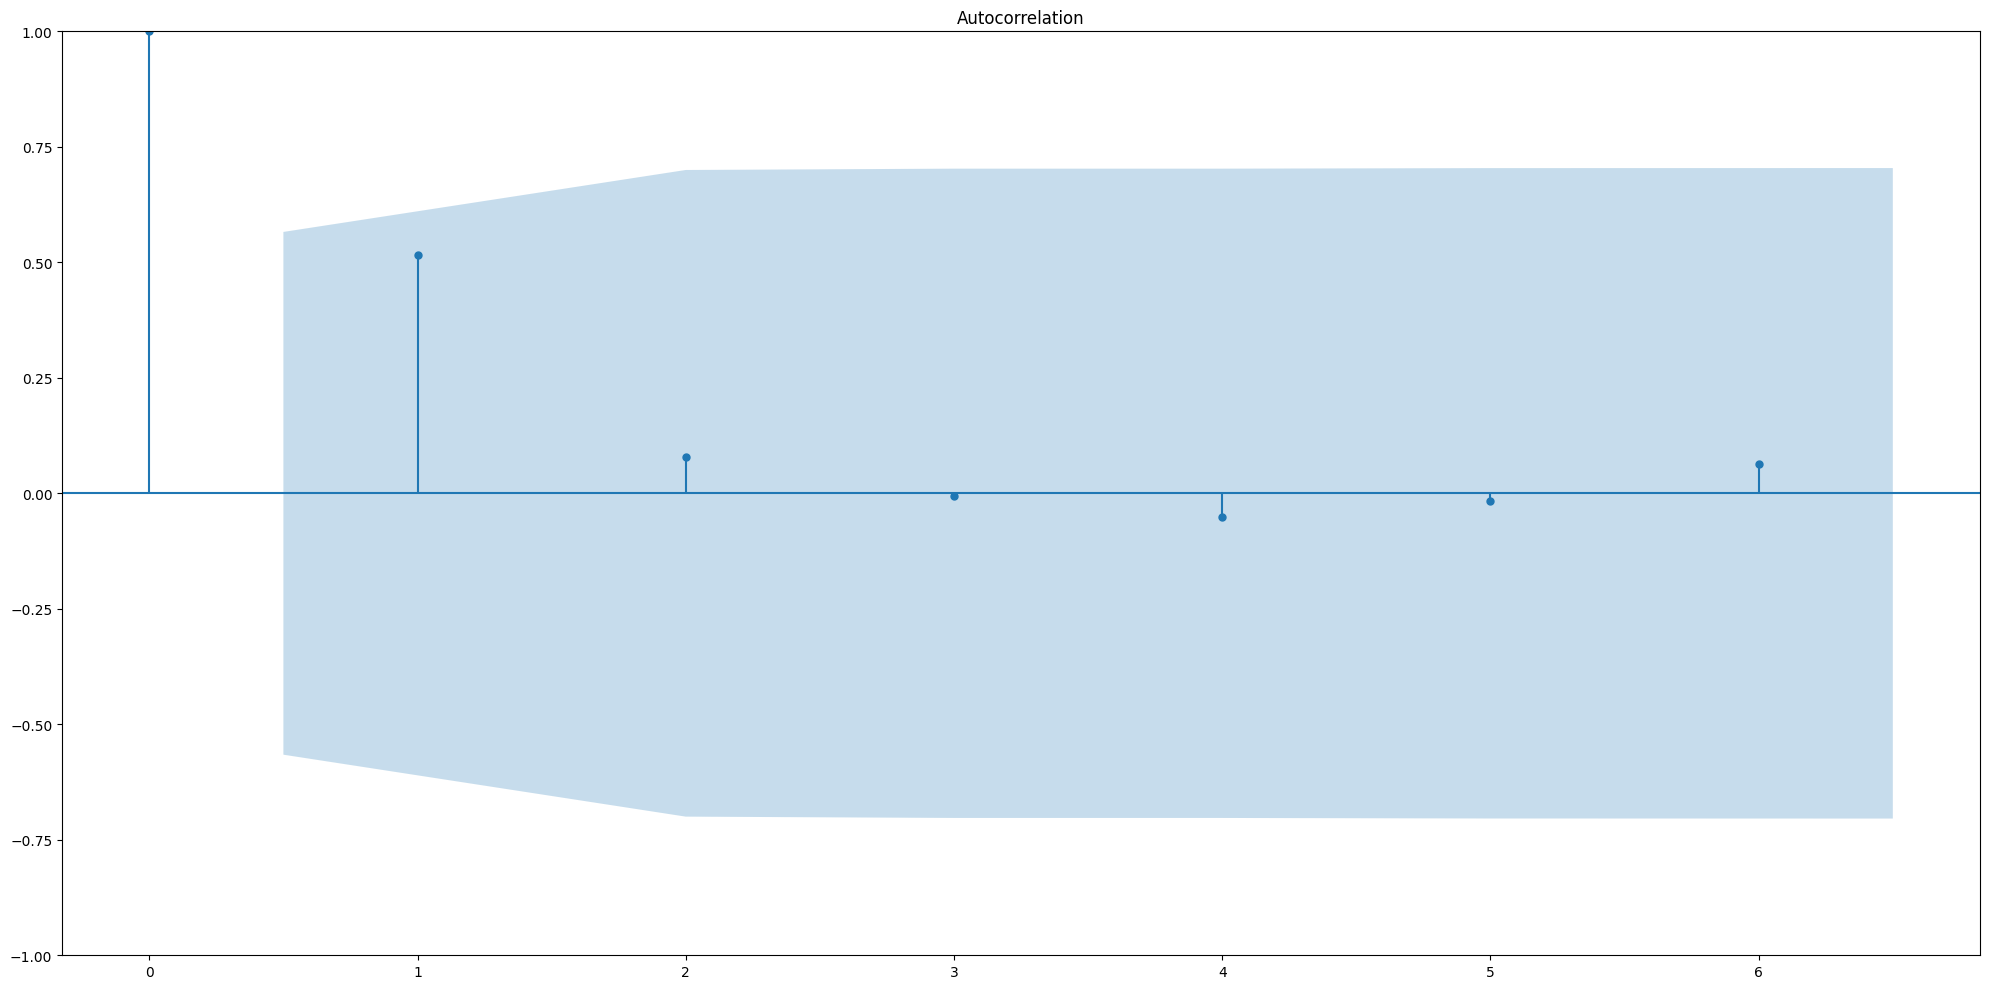

In [158]:

fig = plot_acf(residuals)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

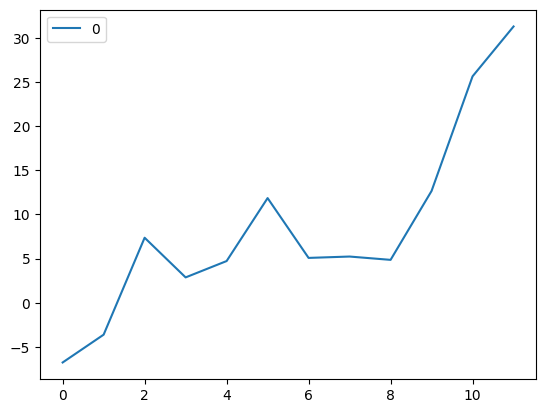

In [159]:
# plot residuals
residuals.plot()
plt.show()

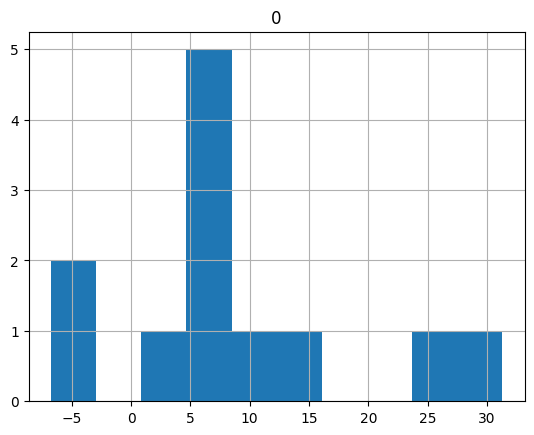

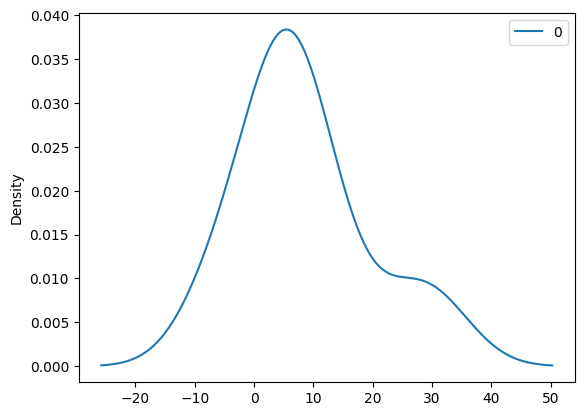

In [160]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

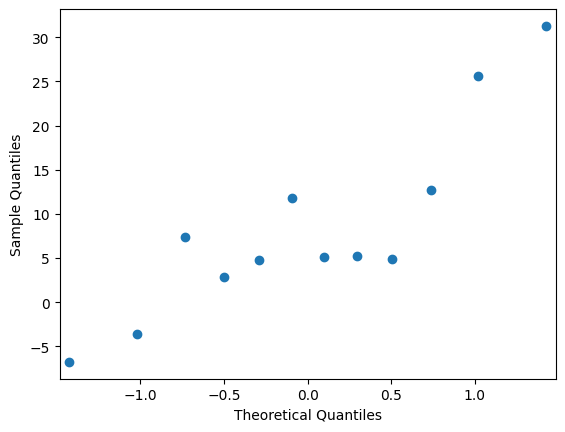

In [161]:
qqplot(residuals)
plt.show()

### Metrics - model evaluation

1. Root Mean Squared Error (RMSE) represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. This is a great measurement to use when comparing models as it shows how many deviations from the mean the forecasted values fall.
2. Mean Absolute Error (MAE) takes the sum of the absolute difference from actual to forecast and averages them. It is less sensitive to the occasional very large error because it does not square the errors in the calculation.
3. Mean Absolute Percentage Error (MAPE) is also often useful for purposes of reporting, because it is expressed in generic percentage terms it will make sense even to someone who has no idea what constitutes a "big" error in terms of dollars spent or widgets sold.

**The additional two model used are:**

1.   MASE (Mean Absolute Scaled Error): Scales the error relative to a naive forecast, providing a benchmark for performance. Lower MASE indicates better performance.

2.   sMAPE (Symmetric Mean Absolute Percentage Error): Provides a balanced view of percentage errors. Lower sMAPE indicates better performance.


For instance, a model with low sMAPE may indicate better performance in capturing the percentage errors, especially useful when stock prices are highly variable.

In [362]:
#define metrics dataframe which will be used below for storing results
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE','MASE', 'sMAPE'])

def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

    # Calculate MASE
    naive_forecast = np.roll(actuals, shift=1)
    naive_forecast[0] = np.nan
    mase = np.mean(np.abs(predictions - actuals)) / np.mean(np.abs(naive_forecast[1:] - actuals[1:]))

    # Calculate sMAPE
    smape = 100 * np.mean(np.abs(predictions - actuals) / (np.abs(actuals) + np.abs(predictions)))

    df = pd.DataFrame({'Model': [model],
                       'RMSE': [rmse],
                       'MAE': [mae],
                       'MAPE': [mape],
                       'MASE': [mase],
                       'sMAPE': [smape]
                       })

    global metrics_dataframe
    metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)
    return metrics_dataframe

In [363]:
#get all the metrics
metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast1.values.flatten(),
                                'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast2.values.flatten(),
                                'Simple 0.5')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast3.values.flatten(),
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_add_pred.values.flatten(),
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_mul_pred.values.flatten(),
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_add_pred.values.flatten(),
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_mul_pred.values.flatten(),
                                'Triple Mul')


<ipython-input-362-bff4a84cb3ef>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)


In [374]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,MASE,sMAPE
5,Triple Add,13.406034,10.162218,10.319839,1.696531,5.555641
6,Triple Mul,13.527286,10.199812,10.374843,1.702807,5.591391
3,Double Add,14.447278,11.423956,11.678436,1.907171,6.314505
4,Double Mul,14.933806,11.879579,12.146302,1.983235,6.588687
1,Simple 0.5,16.261729,13.028028,13.355335,2.174963,7.287413
0,Simple 0.2,16.720613,13.468898,13.794221,2.248564,7.559950
2,Simple 1,17.433577,14.130417,14.452762,2.359001,7.972672


In [375]:
cbre.tail(12).mean()


,0
CBRE_Spline,91.44125


In [376]:
triple_ets_add_pred.values.flatten()

array([77.91832175, 81.59559571, 82.87161094, 83.42941843, 85.21991957,
       82.31541486, 82.31399397, 82.42949372, 83.27547992, 84.42749431,
       85.86646387, 84.38301392])

In [377]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

# Add all predictions
test_pred_df = test_pred_df.assign(triple_ets_add_pred = triple_ets_add_pred.values.flatten(), triple_ets_mul_pred = triple_ets_mul_pred.values.flatten(),
                                   SimpleExp_1_pred = ins_cast3.values.flatten(),
                                   double_ets_add_pred = double_ets_add_pred.values.flatten())

test_pred_df

,CBRE_Spline,triple_ets_add_pred,triple_ets_mul_pred,SimpleExp_1_pred,double_ets_add_pred
2023-10-01,71.170,77.918322,77.737455,78.675,79.126077
2023-11-01,77.995,81.595596,82.704777,78.675,79.577154
2023-12-01,90.240,82.871611,84.377062,78.675,80.028231
2024-01-01,86.310,83.429418,85.629347,78.675,80.479307
2024-02-01,89.950,85.219920,88.127078,78.675,80.930384
2024-03-01,94.170,82.315415,81.338092,78.675,81.381461
2024-04-01,87.400,82.313994,80.799252,78.675,81.832538
2024-05-01,87.670,82.429494,80.909897,78.675,82.283615
2024-06-01,88.140,83.275480,81.522236,78.675,82.734692
2024-07-01,97.090,84.427494,83.508918,78.675,83.185769


In [382]:
# Create an average prediction from the three and check it's metrics
test_pred_df['Average_Predictions'] = (test_pred_df['SimpleExp_1_pred']+test_pred_df['triple_ets_mul_pred']+test_pred_df['triple_ets_add_pred']+test_pred_df['double_ets_add_pred']/4)
test_pred_df

,CBRE_Spline,triple_ets_add_pred,triple_ets_mul_pred,SimpleExp_1_pred,double_ets_add_pred,Average_Predictions
2023-10-01,71.170,77.918322,77.737455,78.675,79.126077,254.112297
2023-11-01,77.995,81.595596,82.704777,78.675,79.577154,262.869661
2023-12-01,90.240,82.871611,84.377062,78.675,80.028231,265.930731
2024-01-01,86.310,83.429418,85.629347,78.675,80.479307,267.853592
2024-02-01,89.950,85.219920,88.127078,78.675,80.930384,272.254593
2024-03-01,94.170,82.315415,81.338092,78.675,81.381461,262.673872
2024-04-01,87.400,82.313994,80.799252,78.675,81.832538,262.246381
2024-05-01,87.670,82.429494,80.909897,78.675,82.283615,262.585295
2024-06-01,88.140,83.275480,81.522236,78.675,82.734692,264.156389
2024-07-01,97.090,84.427494,83.508918,78.675,83.185769,267.407854


In [384]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,MASE,sMAPE
5,Triple Add,13.406034,10.162218,10.319839,1.696531,5.555641
6,Triple Mul,13.527286,10.199812,10.374843,1.702807,5.591391
3,Double Add,14.447278,11.423956,11.678436,1.907171,6.314505
4,Double Mul,14.933806,11.879579,12.146302,1.983235,6.588687
1,Simple 0.5,16.261729,13.028028,13.355335,2.174963,7.287413
0,Simple 0.2,16.720613,13.468898,13.794221,2.248564,7.559950
2,Simple 1,17.433577,14.130417,14.452762,2.359001,7.972672


**Triple Add is the best model based on the metrics provided:** It consistently has the lowest values across all metrics (RMSE, MAE, MAPE, MASE, sMAPE).
This suggests it provides the most accurate forecasts and performs the best relative to other models.

Simple models (Simple 0.5, Simple 0.2, Simple 1) show progressively poorer performance, with increasing errors and higher values across all metrics.

Double models (Double Add, Double Mul) also perform worse than the Triple models but better than the Simple models.

In [347]:
# write data to csv and excel
#test_pred_df.to_csv('/Users/shaikht1/Downloads/test.csv', index = True, header=True)
#test_pred_df.to_excel('/Users/shaikht1/Downloads/test.xlsx', index = True, header=True)